In [35]:
import os
import re
import csv
import pyfftw

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from math import sqrt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures

## Data prep ##

In [36]:
# #####extracting velocity(ux, uy)#####

# # base_path  "../2D_Decay"

# all_folders = os.listdir(base_path)

# numeric_folders = sorted(
#     [folder for folder in all_folders if folder.replace('.', '').isdigit()],
#     key=lambda x: float(x)
# )

# output_dir = "../processed_data"
# os.makedirs(output_dir, exist_ok=True)

# for folder in numeric_folders:
#     folder_path = os.path.join(base_path, folder)
#     if os.path.isdir(folder_path):
#         u_file_path = os.path.join(folder_path, "U")
#         if os.path.isfile(u_file_path):
#             print(f"Processing file: {u_file_path}")
#             with open(u_file_path, 'r') as file:
#                 lines = file.readlines()
#                 data = []
#                 in_data_section = False

#                 for line in lines:
#                     line = line.strip()
#                     if line.startswith("internalField"):
#                         in_data_section = True
#                         continue
#                     if in_data_section:
#                         if line.startswith(")"):
#                             break
#                         match = re.match(r"\(([-\d.eE+]+) ([-\d.eE+]+) [-\d.eE+]+\)", line)
#                         if match:
#                             ux = float(match.group(1))
#                             uy = float(match.group(2))
#                             data.append((ux, uy))

#                 if data:
#                     csv_file = os.path.join(output_dir, f"{folder}_ux_uy_data.txt")
#                     with open(csv_file, "w", newline="") as csvfile:
#                         writer = csv.writer(csvfile)
#                         writer.writerow(["ux", "uy"])
#                         writer.writerows(data)
#                     print(f"Saved {len(data)} entries for folder {folder} to {csv_file}")
#                 else:
#                     print(f"No vector data found in {u_file_path}.")

# def load_csv_data(folder_name):
#     csv_file = os.path.join(output_dir, f"{folder_name}_ux_uy_data.txt")
#     if os.path.isfile(csv_file):
#         try:
#             data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
#             if data.ndim == 1:
#                 data = data.reshape(-1, 2)
#             return data
#         except ValueError:
#             print(f"No valid data in file: {csv_file}")
#             return None
#     else:
#         print(f"No data file found for folder: {folder_name}")
#         return None

# folder_to_process = "0.2"
# data = load_csv_data(folder_to_process)
# if data is not None and len(data) > 0:
#     print(f"Loaded {len(data)} entries from folder {folder_to_process}")
#     avg_ux = np.mean(data[:, 0])
#     avg_uy = np.mean(data[:, 1])
#     print(f"Average ux: {avg_ux:.6f}, uy: {avg_uy:.6f}")
# else:
#     print(f"No data available for folder {folder_to_process}.")


In [37]:
# #####extracting vorticity######

# base_path = "../2D_Decay"
# all_folders = os.listdir(base_path)

# numeric_folders = sorted(
#     [folder for folder in all_folders if folder.replace('.', '').isdigit()],
#     key=lambda x: float(x)
# )

# output_dir = "../proceed_data_vor/proceed_data_v_given/processed_data_vor"
# os.makedirs(output_dir, exist_ok=True)

# for folder in numeric_folders:
#     folder_path = os.path.join(base_path, folder)
#     if os.path.isdir(folder_path):
#         u_file_path = os.path.join(folder_path, "vorticity")
#         if os.path.isfile(u_file_path):
#             with open(u_file_path, 'r') as file:
#                 lines = file.readlines()
#                 vorticity_data = []
#                 in_data_section = False

#                 for line in lines:
#                     line = line.strip()
#                     if line.startswith("internalField"):
#                         in_data_section = True
#                         continue
#                     if in_data_section:
#                         if line.startswith(")"):
#                             break
#                         match = re.match(r"\([\d\-eE.+]+ [\d\-eE.+]+ ([\d\-eE.+]+)\)", line)
#                         if match:
#                             vorticity = float(match.group(1))  # 3번째 열 추출(z축만 추출)
#                             vorticity_data.append(vorticity)

#                 csv_file = os.path.join(output_dir, f"{folder}_vor_data.txt")
#                 with open(csv_file, "w", newline="") as csvfile:
#                     writer = csv.writer(csvfile)
#                     writer.writerow(["vorticity"])
#                     writer.writerows([[value] for value in vorticity_data])
#                 print(f"Saved {len(vorticity_data)} entries for folder {folder} to {csv_file}")

# def load_csv_data(folder_name):
#     csv_file = os.path.join(output_dir, f"{folder_name}_vor_data.txt")
#     if os.path.isfile(csv_file):
#         data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
#         return data
#     else:
#         print(f"No data file found for folder: {folder_name}")
#         return None

# folder_to_process = "0.2"
# vor_data = load_csv_data(folder_to_process)
# if vor_data is not None:
#     print(f"Loaded {len(vor_data)} entries from folder {folder_to_process}")
#     print(f"Average vorticity: {np.mean(vor_data):.6f}")


## declare file path ##

In [38]:
files = [
    '../proceed_data/proceed_data_v_given/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_u/150_ux_uy_data.txt',
    
]
files2 = [
    '../proceed_data/proceed_data_v_10/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_u/50_ux_uy_data.txt',
]


files_vor = [
    '../proceed_data/proceed_data_v_given/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_given/processed_data_vor/150_vor_data.txt',
    
]

files2_vor = [
    '../proceed_data/proceed_data_v_10/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_10/processed_data_vor/50_vor_data.txt',
]

files3 = [
    '../proceed_data/proceed_data_v_half/processed_data_u/0_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/5_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/15_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/20_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/25_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/35_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/40_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/45_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/50_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/70_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/90_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/110_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/130_ux_uy_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_u/150_ux_uy_data.txt',
    # '../proceed_data/proceed_data_v_half/processed_data_u/170_ux_uy_data.txt',
    # '../proceed_data/proceed_data_v_half/processed_data_u/186_ux_uy_data.txt',
]

files3_vor = [
    '../proceed_data/proceed_data_v_half/processed_data_vor/0.2_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/5_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/15_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/20_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/25_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/35_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/40_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/45_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/50_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/70_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/90_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/110_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/130_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/150_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/170_vor_data.txt',
    '../proceed_data/proceed_data_v_half/processed_data_vor/186_vor_data.txt',
]


## separating ux, uy ##

In [39]:
def sep(data):
    df = pd.read_csv(data)
    ux = df['ux'].values
    uy = df['uy'].values
    
    return ux, uy
    
def resizing(ux, uy):
    N = 1024
    ux_2d = ux.reshape((N, N))
    uy_2d = uy.reshape((N, N))
    return ux_2d, uy_2d

## Function of Loading vorticity and E_K Plotting ##

In [40]:
def get_ek(file):
    ux, uy = sep(file)
    ux,uy = resizing(ux, uy)
    k, e_k = ek(ux, uy, 1024)
    return k, e_k

def get_vorticity(file):
    
    data = pd.read_csv(file, header=0).values.flatten()
    data = data[~np.isnan(data)]
    data = data[0:1024 * 1024]
    label = file.split('/')[-1].split('_')[0]
    
    return data, label

def velocity_plotting(file):
    
    ux, uy = sep(file)
    label = file.split('/')[-1].split('_')[0]
    ux_2d = ux.reshape((N, N))
    uy_2d = uy.reshape((N, N))
    k_array, Ek_array = ek(ux_2d, uy_2d, 1024)
    Ek_array[0] = 10e-21
    label = file.split('/')[-1].split('_')[0]
    plt.loglog(k_array, Ek_array, label=f"{label}s")    

def compared_line():
    k_a = np.logspace(0, 1, 500)
    E_k_a = ((k_a)**-(5/3)) * 10e-1
    plt.loglog(k_a, E_k_a, linestyle='--', color='red', label="E(k) = k^-5/3")
    k_a_shift = k_a * 10
    E_k_a_2 = ((k_a)**-4) * 10e-3
    plt.loglog(k_a_shift, E_k_a_2, linestyle='--', color='black', label="E(k) = k^-4")

## Energy Spectrum Function ##

In [41]:
def ek(u, v, n_bins):

    Ny, Nx = u.shape
    Lx = 2.0 * np.pi
    Ly = 2.0 * np.pi
    
    dx = Lx / Nx
    dy = Ly / Ny

    u_prime = u - np.mean(u)
    v_prime = v - np.mean(v)

    U_hat = np.fft.fft2(u_prime)
    V_hat = np.fft.fft2(v_prime)

    PS = (np.abs(U_hat)**2 + np.abs(V_hat)**2) / (Nx * Ny)**2
    
    kx = 2.0*np.pi * np.fft.fftfreq(Nx, d=dx)
    ky = 2.0*np.pi * np.fft.fftfreq(Ny, d=dy)
    
    KX, KY = np.meshgrid(kx, ky)
    
    K_mag = np.sqrt(KX**2 + KY**2)
    
    k_max = K_mag.max()
    
    bins = np.linspace(0, k_max, n_bins+1)
    
    E_k = np.zeros(n_bins)
    k_vals = np.zeros(n_bins)
    
    for i in range(n_bins):
        k_min = bins[i]
        k_max_ = bins[i+1]
        
        mask = (K_mag >= k_min) & (K_mag < k_max_)
        
        shell_sum = np.sum(PS[mask])
        
        k_mid = 0.5*(k_min + k_max_)
        
        E_k[i] = shell_sum
        k_vals[i] = k_mid

    return k_vals, E_k

In [42]:
def compute_spectrum(u_data):
    grid_size = 1024
    ux = u_data.reshape((grid_size, grid_size))
    
    ux_fft = np.fft.fftn(ux)
    energy_density = 0.5 * (np.abs(ux_fft)**2)
    
    kx = np.fft.fftfreq(grid_size) * grid_size
    #ky = np.fft.fftfreq(grid_size) * grid_size
    k = np.sqrt(kx[:, None]**2)
    
    k_bins = np.arange(-10, k.max(), 1)
    k_spectrum = np.zeros(len(k_bins) - 1)
    
    for i in range(len(k_bins) - 1):
        mask = (k >= k_bins[i]) & (k < k_bins[i+1])
        if np.any(mask):
            k_spectrum[i] = energy_density[mask].mean()
    
    return k_bins[:-1], k_spectrum

In [43]:
# compute the energy spectrum numerically using vorticity
def ensp(nx,ny,w):
    
    '''
    Computation of energy spectrum and maximum wavenumber from vorticity field
    
    Inputs
    ------
    nx,ny : number of grid points in x and y direction
    w : vorticity field in physical spce (including periodic boundaries)
    
    Output
    ------
    en : energy spectrum computed from vorticity field
    n : maximum wavenumber
    '''
    w = data.reshape(1024, 1024)
    dx = 6.283/1024
    
    epsilon = 1.0e-6

    kx = np.empty(nx)
    ky = np.empty(ny)
    
    kx[0:int(nx/2)] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(0,int(nx/2)))
    kx[int(nx/2):nx] = 2*np.pi/(np.float64(nx)*dx)*np.float64(np.arange(-int(nx/2),0))

    ky[0:ny] = kx[0:ny]
    
    kx[0] = epsilon
    ky[0] = epsilon

    kx, ky = np.meshgrid(kx, ky, indexing='ij')
    
    a = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')
    b = pyfftw.empty_aligned((nx,ny),dtype= 'complex128')

    fft_object = pyfftw.FFTW(a, b, axes = (0,1), direction = 'FFTW_FORWARD')
    wf = fft_object(w[0:nx,0:ny]) 
    
    es =  np.empty((nx,ny))
    
    kk = np.sqrt(kx[:,:]**2 + ky[:,:]**2)
    es[:,:] = np.pi*((np.abs(wf[:,:])/(nx*ny))**2)/kk
    
    n = int(np.sqrt(nx*nx + ny*ny)/2.0)-1
    
    en = np.zeros(n+1)
    
    for k in range(1,n+1):
        en[k] = 0.0
        ic = 0
        ii,jj = np.where((kk[1:,1:]>(k-0.5)) & (kk[1:,1:]<(k+0.5)))
        ic = ii.size
        ii = ii+1
        jj = jj+1
        en[k] = np.sum(es[ii,jj])
                    
        en[k] = en[k]/ic
        
    return en, n

## Visualizing (only k - E(k)) ##

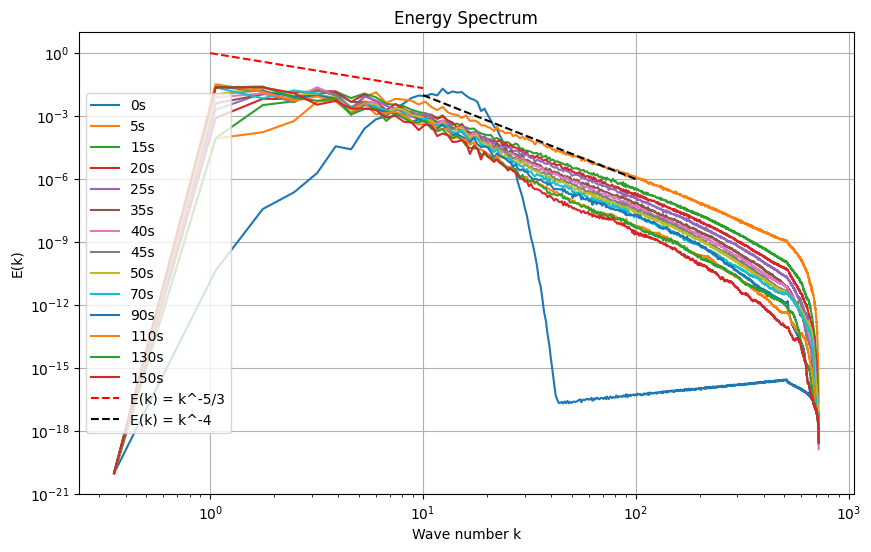

In [44]:
plt.figure(figsize=(10,6))
N = 1024
for file in files:
    velocity_plotting(file)

compared_line()
plt.xlabel('Wave number k')
plt.ylabel('E(k)')
plt.title('Energy Spectrum')
plt.legend()
plt.grid(True)
plt.show()

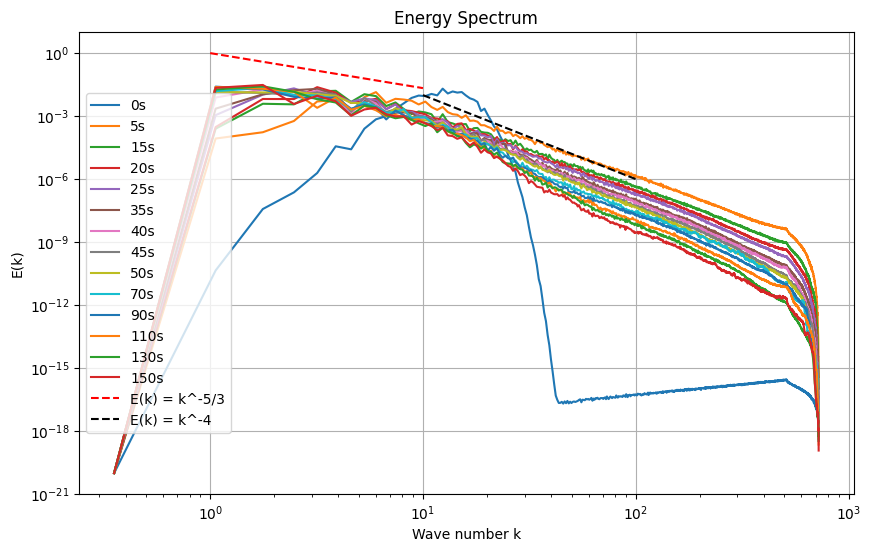

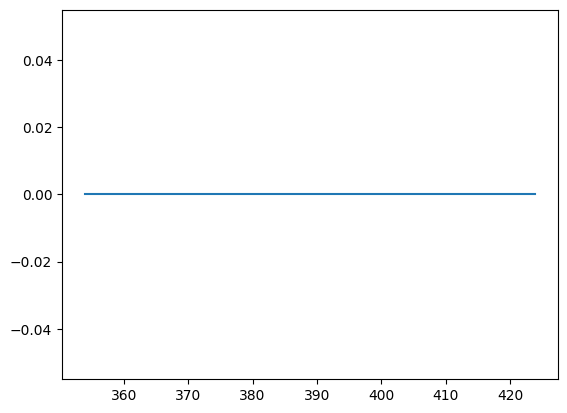

[0. 0. 0. ... 0. 0. 0.]


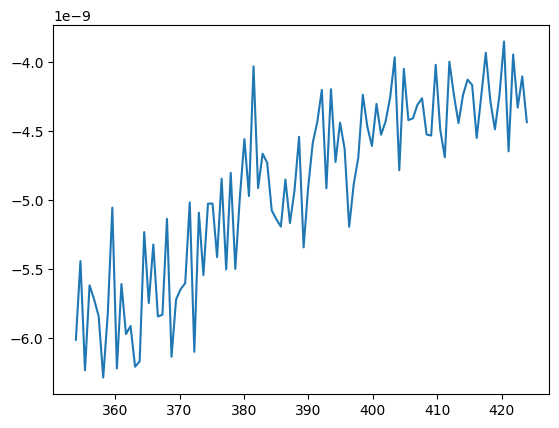

[-1.61634838e-36 -1.87667735e-07  8.49492173e-07 ... -4.56945483e-15
 -8.90541017e-16 -3.56989499e-16]


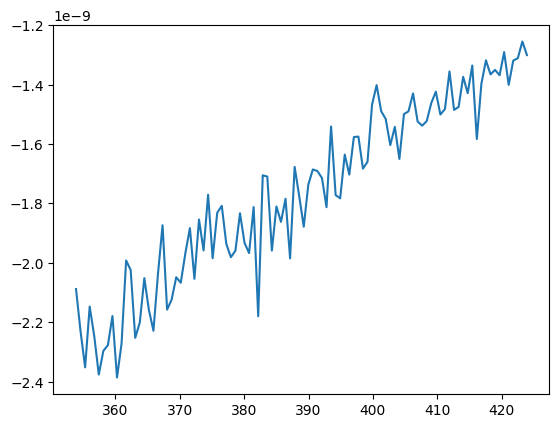

[ 5.18409434e-35 -1.62567238e-04 -5.17196093e-04 ... -3.75280088e-16
 -1.90602741e-16 -1.03810742e-16]


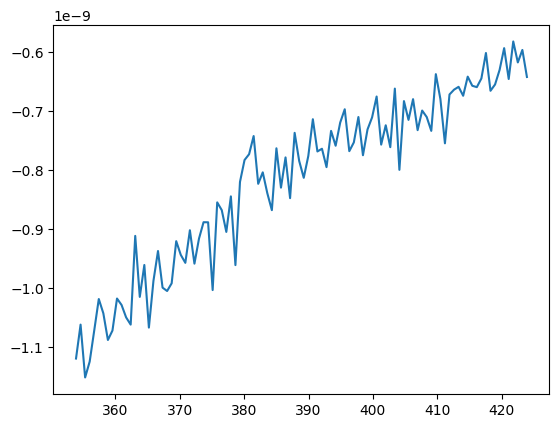

[ 3.29382798e-35  5.15099931e-04  1.35114639e-04 ... -7.74039724e-17
 -2.49478281e-17 -6.37564318e-18]


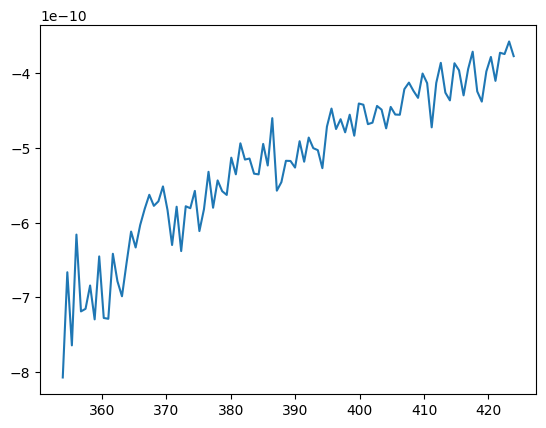

[-5.86324365e-36  8.98394977e-04  1.70439845e-03 ... -4.41624358e-17
 -1.60453642e-17 -1.01674097e-18]


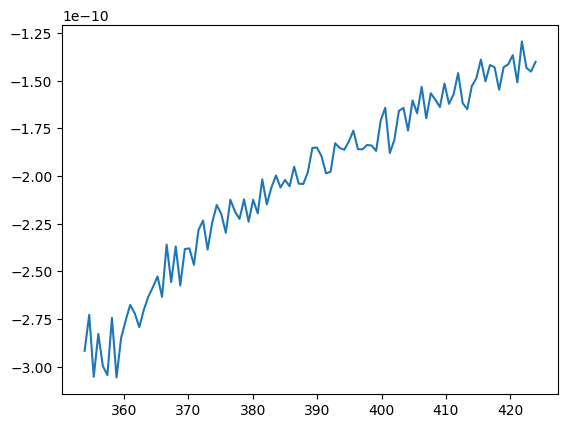

[-8.39120977e-36  1.80176428e-03 -5.05935877e-05 ... -9.26232371e-18
 -4.54669424e-18 -5.38728008e-19]


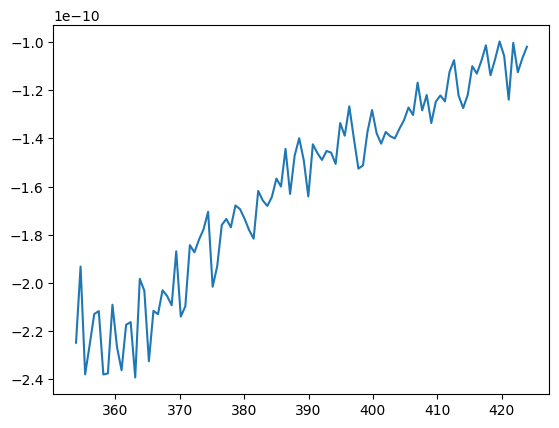

[ 8.44821324e-36  2.99829059e-05 -6.56538367e-03 ... -3.07160856e-18
 -1.10111454e-18 -5.82525183e-19]


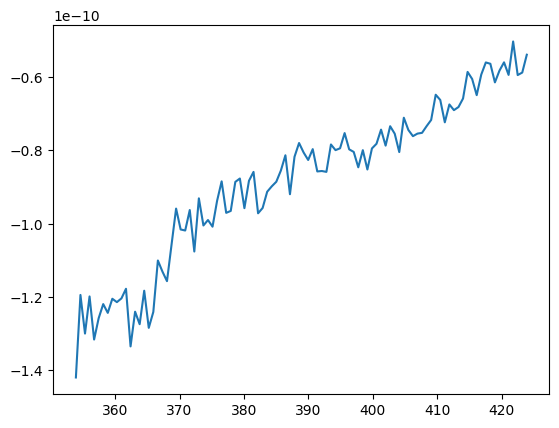

[ 1.01387261e-34 -3.67172444e-03  4.82227253e-03 ... -1.07194930e-18
 -2.59658267e-19 -2.97235080e-19]


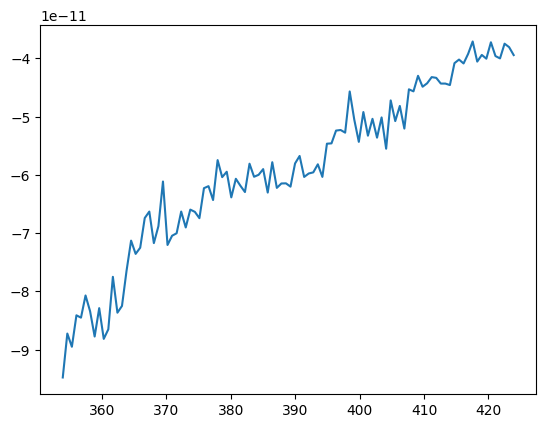

[ 4.08362330e-35 -3.21821759e-03  9.09245771e-03 ... -1.52736090e-18
 -7.63162101e-19 -5.14952028e-19]


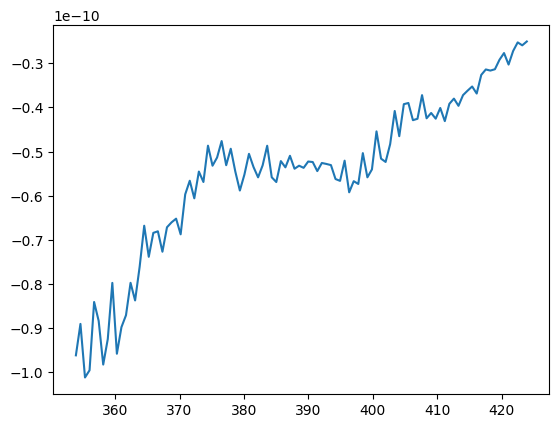

[ 9.29019166e-34  7.87135992e-03 -1.49912491e-02 ... -5.34879332e-18
 -1.72966172e-18 -1.07389862e-18]


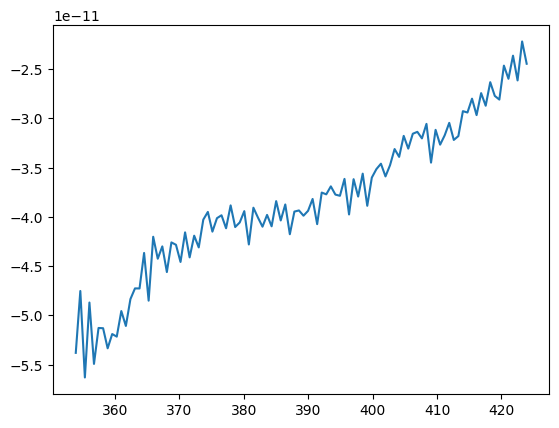

[-1.85244326e-35  1.06400496e-03 -4.02116366e-03 ... -3.44244656e-19
 -1.45742644e-19 -8.14611540e-20]


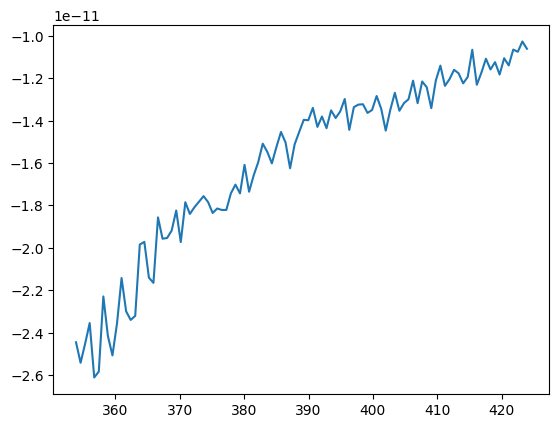

[ 1.33451751e-33  8.44450135e-03 -5.86526129e-03 ... -1.09150640e-18
 -1.34484926e-20  3.24177545e-19]


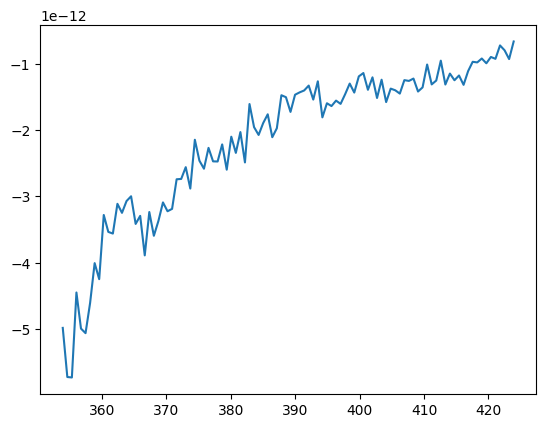

[ 2.77398442e-34  4.50758106e-03 -5.84706187e-04 ...  7.08606545e-19
 -5.52504267e-19  3.26683298e-20]


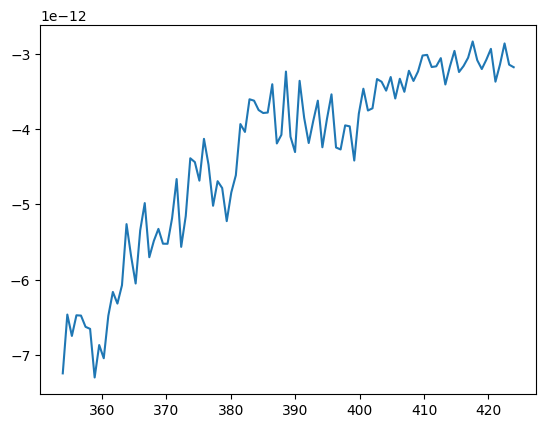

[-3.24148709e-35  1.13259727e-03 -7.21342949e-03 ... -1.98071690e-19
 -2.41517594e-19  1.84158728e-19]


In [45]:
plt.figure(figsize=(10,6))
for file in files3:
    velocity_plotting(file) 
compared_line()
plt.xlabel('Wave number k')
plt.ylabel('E(k)')
plt.title('Energy Spectrum')
plt.legend()
plt.grid(True)
plt.show()

ek1 = []
ek3 = []
ek4 = []
for file1, file3 in zip(files, files3):
    k1, ek1 = get_ek(file1)
    k3, ek3 = get_ek(file3)
    ek4.append(ek1-ek3)
    # ek4 = [abs(ek4) for ek4 in ek4]
    ek4 = ek4[0]
    plt.figure()
    plt.plot(k1[500:600], ek4[500:600])
    plt.show()
    print(ek4)
    ek4=[]


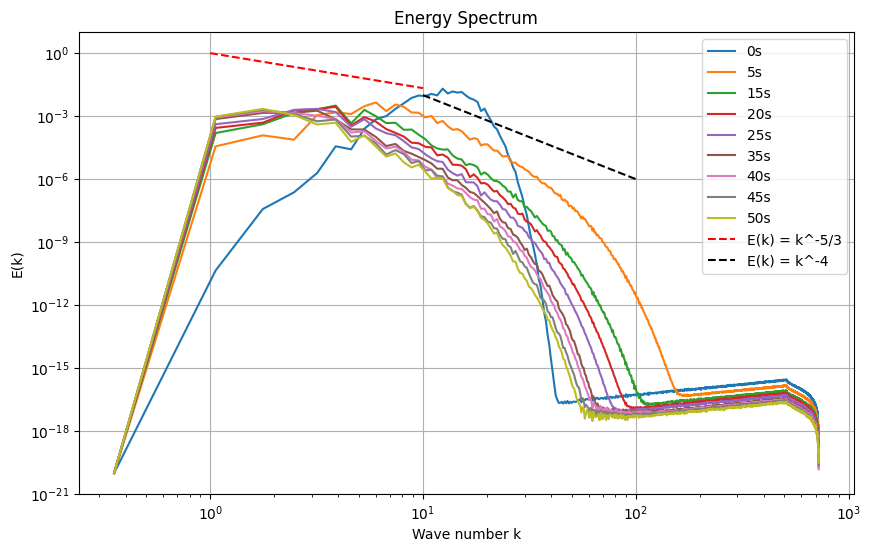

In [46]:
plt.figure(figsize=(10,6))
N = 1024
for file in files2:
    velocity_plotting(file) 
compared_line()
plt.xlabel('Wave number k')
plt.ylabel('E(k)')
plt.title('Energy Spectrum')
plt.legend()
plt.grid(True)
plt.show()

## Cal. Dissp. rate ##

In [47]:
def dissp_rate(ux, nu):
    L = 6.283
    grid_size = 1024
    dx = L/grid_size
    nu = nu  # given:0.00001
    
    ux = ux.reshape((grid_size, grid_size))
    ux_prime = ux - np.mean(ux)
    
    duxdx = (np.roll(ux_prime, -1, axis=1) - np.roll(ux_prime, 1, axis=1)) / (2 * dx)
    duxdy = (np.roll(ux_prime, -1, axis=0) - np.roll(ux_prime, 1, axis=0)) / (2 * dx)
    
    epsilon = 0.5 * nu * np.mean(duxdx**2 + duxdy**2)
    print(f"ε: {epsilon:.6e} m²/s³")
    return epsilon

ε: 7.671993e-05 m²/s³
ε: 2.827554e-05 m²/s³
ε: 1.254915e-05 m²/s³
ε: 9.027902e-06 m²/s³
ε: 7.649634e-06 m²/s³
ε: 5.781600e-06 m²/s³
ε: 5.885801e-06 m²/s³
ε: 5.516056e-06 m²/s³
ε: 5.050336e-06 m²/s³
ε: 3.902053e-06 m²/s³
ε: 3.301975e-06 m²/s³
ε: 3.204711e-06 m²/s³
ε: 2.550474e-06 m²/s³
ε: 2.161404e-06 m²/s³


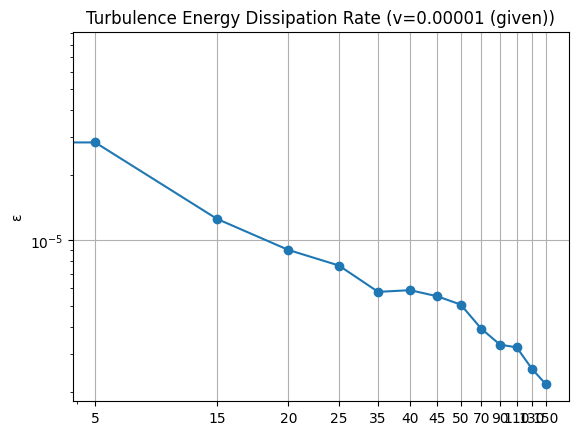

In [48]:
eps1 = np.array([])
time_for_eps = np.array([])
for file in files:
    ux, uy = sep(file)
    epsilon = dissp_rate(ux, 0.00001)
    eps1 = np.append(eps1, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps = np.append(time_for_eps, label)
plt.loglog(time_for_eps, eps1, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.00001 (given))")
plt.grid(True)
plt.show()

ε: 3.835997e-05 m²/s³
ε: 1.490715e-05 m²/s³
ε: 6.861555e-06 m²/s³
ε: 5.571942e-06 m²/s³
ε: 4.089786e-06 m²/s³
ε: 3.207011e-06 m²/s³
ε: 2.682493e-06 m²/s³
ε: 2.656224e-06 m²/s³
ε: 2.644201e-06 m²/s³
ε: 2.267040e-06 m²/s³
ε: 1.738368e-06 m²/s³
ε: 1.489265e-06 m²/s³
ε: 1.452274e-06 m²/s³
ε: 1.286277e-06 m²/s³


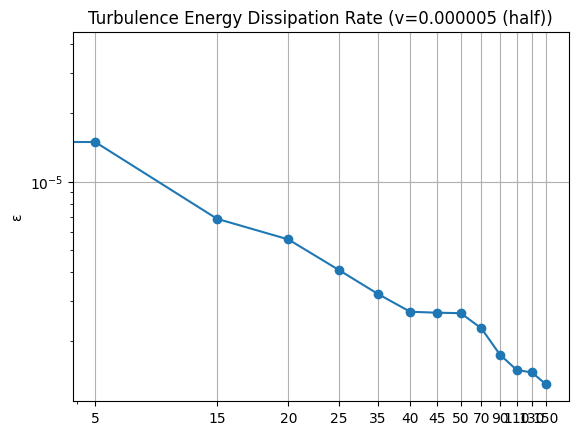

In [49]:
eps3 = np.array([])
time_for_eps3 = np.array([])
for file in files3:
    ux, uy = sep(file)
    epsilon = dissp_rate(ux, 0.000005)
    eps3 = np.append(eps3, epsilon)
    label = file.split('/')[-1].split('_')[0]
    time_for_eps3 = np.append(time_for_eps3, label)
plt.loglog(time_for_eps3, eps3, marker='o', linestyle='-')
plt.ylabel("ε")
plt.title("Turbulence Energy Dissipation Rate (v=0.000005 (half))")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'eps: v(given) - v(10 times)')

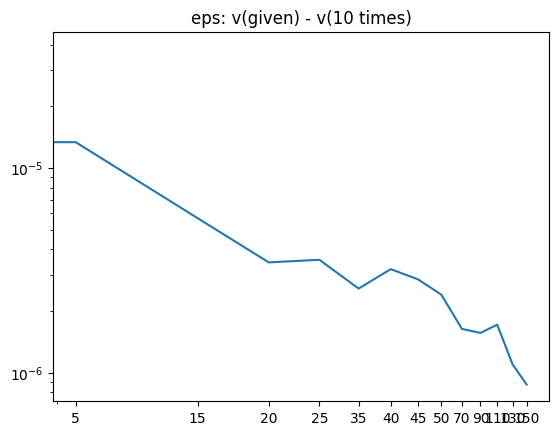

In [50]:
eps = eps1[0:14]-eps3[0:14]
plt.loglog(time_for_eps, eps)
plt.title("eps: v(given) - v(10 times)")

## enstrophy_diss ##

In [51]:
def enstrophy_diss(omega, nu):
    dx = 6.283 / 1024
    size = 1024
    omega = omega.reshape((size, size))
    # ∇ω
    domega_dx = (np.roll(omega, -1, axis=1) - np.roll(omega, 1, axis=1)) / (2 * dx)
    domega_dy = (np.roll(omega, -1, axis=0) - np.roll(omega, 1, axis=0)) / (2 * dx)
    
    # |∇ω|²
    grad_omega_squared = domega_dx**2 + domega_dy**2

    zeta = nu * np.mean(grad_omega_squared)
    
    return zeta
    
def kd_2d(zeta, nu):
    kd = (zeta/(nu)**3)**(1/6)
    return kd

[0.03536677 0.43587494 0.13863329 0.08406253 0.05752166 0.03016003
 0.02342687 0.01766725 0.01374619 0.00993917 0.00692099 0.00416027
 0.00302757 0.00203318 0.00254334 0.00172254]


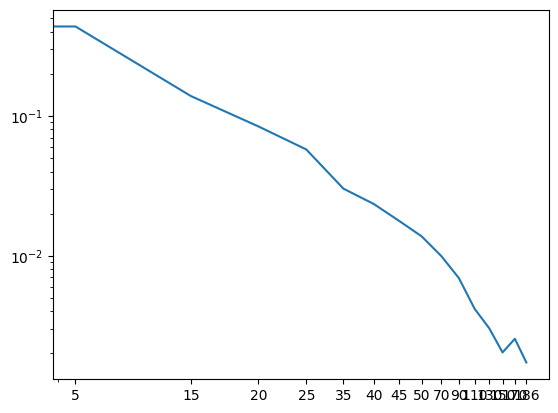

In [52]:
DataNum = len(files_vor)

zeta1 = np.array([])
label1 = np.array([])

for file in files3_vor:
    data, label = get_vorticity(file)
    nu = 0.00001 #given
    # nu = 0.0001 #10 times
    zeta_value = enstrophy_diss(data, nu)
    zeta1 = np.append(zeta1, zeta_value)
    label1 = np.append(label1, label)
    
print(zeta1)
plt.loglog(label1, zeta1)

In [53]:
kd1 = kd_2d(zeta1, 0.00001)
kd1

array([181.1754039 , 275.35543348, 227.49817787, 209.29896077,
       196.47406839, 176.42981177, 169.15533676, 161.38437228,
       154.77366594, 146.63074898, 138.04733414, 126.81975321,
       120.27694425, 112.55445674, 116.8335327 , 109.48679789])

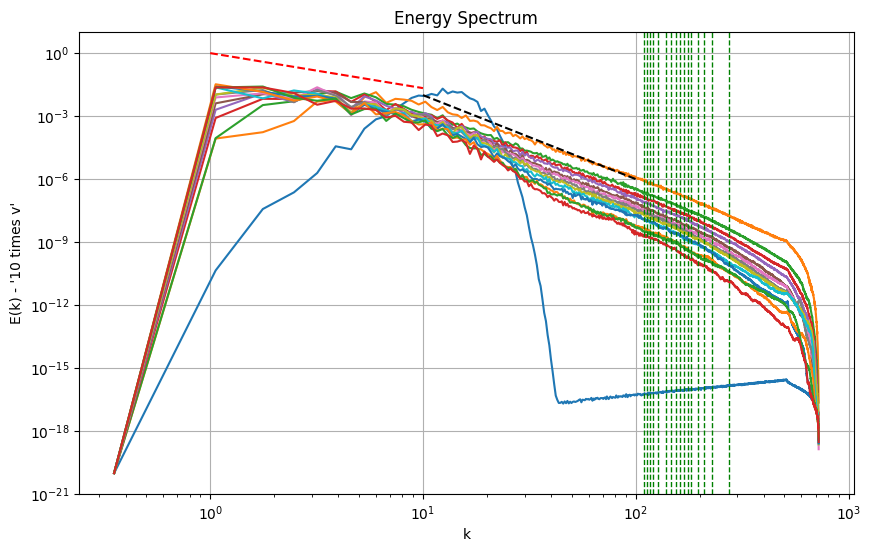

In [54]:
plt.figure(figsize=(10, 6))
N=1024
for file in files:
    velocity_plotting(file)
    k, e_k = get_ek(file)

for x in kd1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1, label=f"x = {x}")
    
compared_line()
plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
#plt.legend()
plt.grid(True)
plt.show()

## compute palinstrophy ##

compute: [[ 0.71122142  0.68514548  0.69019769 ...  0.13494302  0.53879423
   0.71154737]
 [ 0.74292     0.70714706  0.69622775 ...  0.01051187  0.44736545
   0.65165418]
 [ 0.78235986  0.74430528  0.71741446 ... -0.09851818  0.35422543
   0.58312334]
 ...
 [ 0.61848884  0.63071194  0.63429738 ...  0.47621196  0.67960434
   0.70771747]
 [ 0.63372697  0.63731241  0.65654342 ...  0.37117479  0.65621748
   0.7325711 ]
 [ 0.65124675  0.64187571  0.66192159 ...  0.24812892  0.60056163
   0.7216518 ]]
test: ../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt
Calculated Palinstrophy: 79.056120


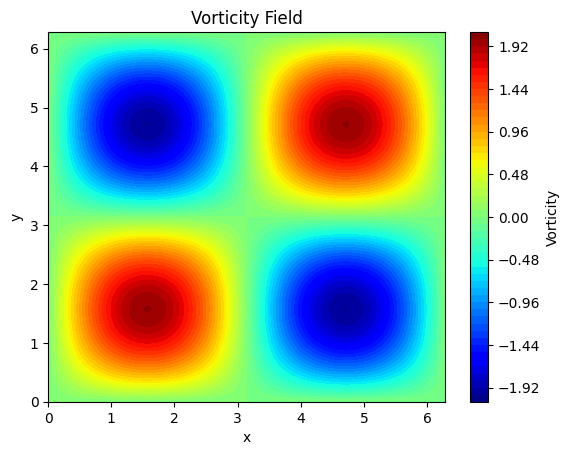

In [55]:
# Example usage
nx, ny = 1024, 1024  # Grid size
Lx, Ly = 2 * np.pi, 2 * np.pi  # Domain size
dx, dy = Lx / nx, Ly / ny
N=1024
def compute_vorticity(u, v, dx, dy):
    """
    Calculate the vorticity ω = (dv/dx - du/dy)
    :param u: 2D array of x-direction velocity
    :param v: 2D array of y-direction velocity
    :param dx: Grid spacing in x-direction
    :param dy: Grid spacing in y-direction
    :return: 2D array of vorticity
    """

    dudy, dudx = np.gradient(u, dy, dx)
    dvdy, dvdx = np.gradient(v, dy, dx)
    vorticity = dvdx - dudy
    return vorticity

test_data = '../proceed_data/proceed_data_v_given/processed_data_u/50_ux_uy_data.txt'
test_data2 = '../proceed_data/proceed_data_v_given/processed_data_vor/50_vor_data.txt'

ux, uy = sep(test_data)
ux_2d = ux.reshape((N, N))
uy_2d = uy.reshape((N, N))
vorticity123 = compute_vorticity(ux_2d, uy_2d, dx, dy)
print(f"compute: {vorticity123}")
print(f"test: {test_data}")

def compute_palinstrophy(vorticity, dx, dy):
    """
    Calculate the palinstrophy = integral (grad(ω))^2 dA
    :param vorticity: 2D array of vorticity field
    :param dx: Grid spacing in x-direction
    :param dy: Grid spacing in y-direction
    :return: palinstrophy value
    """
    dωdy, dωdx = np.gradient(vorticity, dy, dx)
    grad_omega_squared = dωdx**2 + dωdy**2
    palinstrophy = np.sum(grad_omega_squared) * dx * dy
    return palinstrophy



# Example velocity field (Taylor-Green vortex)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

u = np.sin(X) * np.cos(Y)  # Example u-component velocity
v = -np.cos(X) * np.sin(Y)  # Example v-component velocity

# Compute vorticity and palinstrophy
vorticity = compute_vorticity(u, v, dx, dy)
palinstrophy_value = compute_palinstrophy(vorticity, dx, dy)

print(f"Calculated Palinstrophy: {palinstrophy_value:.6f}")

# Visualize vorticity field
plt.contourf(X, Y, vorticity, levels=50, cmap='jet')
plt.colorbar(label="Vorticity")
plt.title("Vorticity Field")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Three dimensional forced case ##

In [57]:
def kom_scale(eps, nu):
    eta = ((nu**3)/eps)**(1/4)

    return eta
def kd_range(eps, nu):
    kd = (eps**(1/4))/(nu**(3/4))
    return kd

In [58]:
eta1 = kom_scale(eps1, 0.00001)
kd1 = kd_range(eps1, 0.00001)
kd1

array([526.29234844, 410.06503058, 334.69838087, 308.24547754,
       295.74006049, 275.74777394, 276.98190625, 272.52551787,
       266.58153657, 249.93282301, 239.71401998, 237.92890986,
       224.72698681, 215.61748119])

In [59]:
eta2 = kom_scale(eps2, 0.0001)
kd2 = kd_range(eps2, 0.0001)
kd2

array([166.42825362, 131.40326731, 108.23385597, 102.74463532,
        95.10046424,  89.49166686,  85.5839162 ,  85.37361538,
        85.27684226,  82.05825558,  76.78792805,  73.8755133 ,
        73.41243943,  71.21822264])

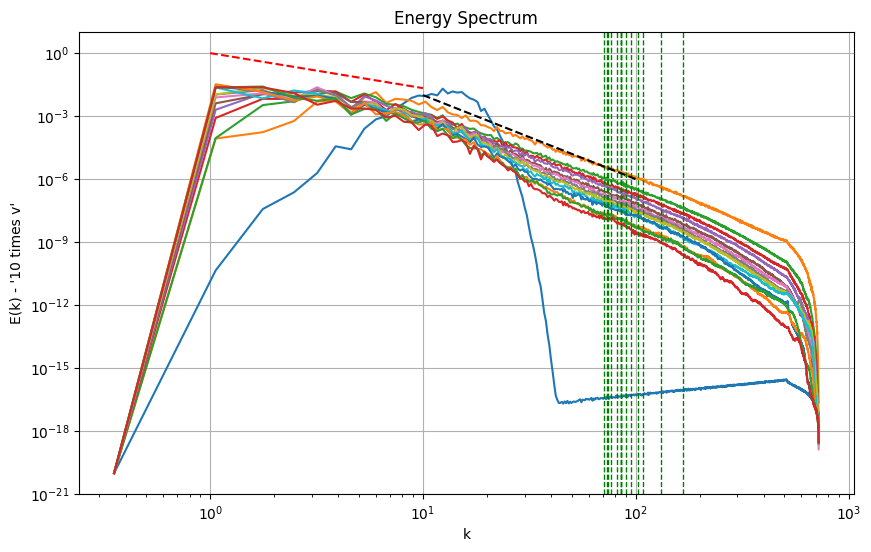

In [60]:
plt.figure(figsize=(10, 6))
for file in files:
    velocity_plotting(file)    

for x in kd2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1, label=f"x = {x}")
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.grid(True)
plt.show()

## Two dimension forced decay ##

In [61]:
from scipy.ndimage import sobel

def cal_enstrophy(data, label, visualize=False):
    
    L = 6.283
    grid_size = 1024
    dx = L/grid_size
    dy = dx
    
    vorticity = data.reshape((1024, 1024))
    
    # dux_dx = sobel(ux, axis=1, mode='wrap') / (2.0 * dx) #diff
    # dux_dy = sobel(ux, axis=0, mode='wrap') / (2.0 * dy) #diff

    # duy_dx = dux_dx
    # duy_dy = dux_dy

    # vorticity = duy_dx - dux_dy

    # ∫ |ω|^2 dA
    enstrophy = np.sum(vorticity**2) * (dx * dy)

    if visualize:
        plt.figure(figsize=(6, 5))
        plt.imshow(vorticity, cmap='coolwarm', origin='lower')
        plt.colorbar(label='Vorticity')
        #plt.title(f"Vorticity Field, t={label}")
        plt.title(f"Vorticity Field")
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.grid(False)
        plt.show()

    return enstrophy

In [62]:
ens1 = np.array([])
ens2 = np.array([])

for file in files_vor:
    data, label = get_vorticity(file)
    ens1_1 = cal_enstrophy(data, label, visualize=False)
    ens1 = np.append(ens1, ens1_1)

for file in files2_vor:
    data, label = get_vorticity(file)
    ens2_2 = cal_enstrophy(data, label, visualize=False)
    ens2 = np.append(ens2, ens2_2)
print(f"Calculated Enstrophy(given): {ens1}")
print(f"Calculated Enstrophy(10 times): {ens2}")

Calculated Enstrophy(given): [622.47369241 449.65100924 189.99161302 149.58269969 126.80970814
  99.20512223  90.21255735  83.60021779  78.48745206  62.58748703
  52.47224792  45.46534869  40.24796497  35.25493011]
Calculated Enstrophy(10 times): [571.08557667  71.32723724  11.99535008   7.13408766   4.8088235
   2.59166663   2.01485953   1.61526208   1.31846151]


In [63]:
eps1 = ens1**(3/2)
nu1 = 0.0001
Ld1 = (nu1**3/eps1)**(1/6)
kd1 = Ld1**(-1)
kl1 = kd1 - Ld1
print(kd1)

eps2 = ens2**(3/2)
nu2 = 0.0001
Ld2 = (nu2**3/eps2)**(1/6)
kd2 = Ld2**(-1)
kl2 = kd2 - Ld2
print(kd2)

[499.4939708  460.4886106  371.26465656 349.71989699 335.57386174
 315.59747808 308.18872675 302.37915719 297.64600491 281.26900613
 269.14258385 259.6690156  251.87553247 243.67162779]
[488.84963803 290.61220566 186.10293906 163.43106485 148.08453616
 126.88047162 119.14098699 112.73551404 107.15609133]


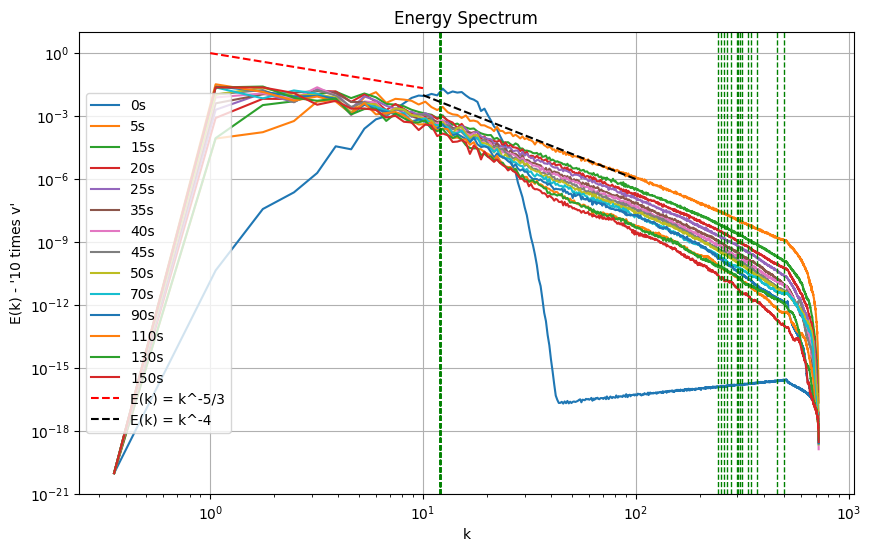

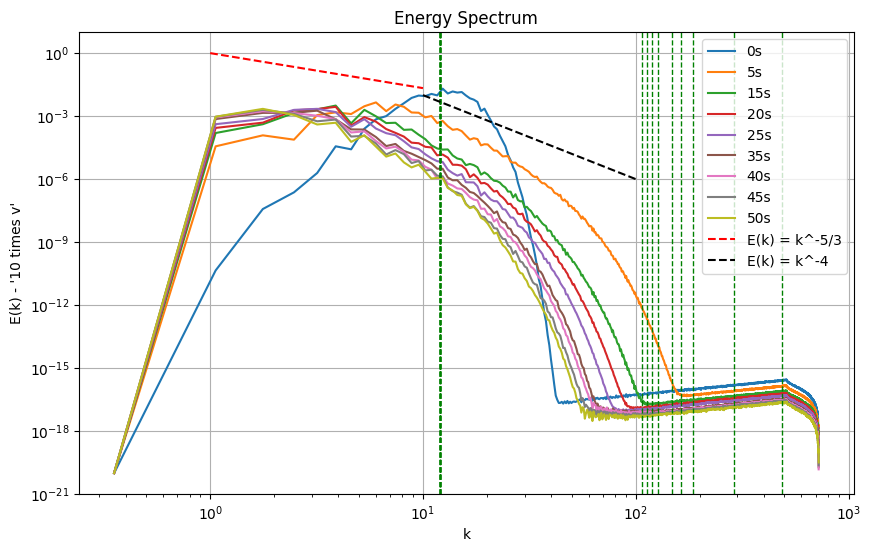

In [64]:
plt.figure(figsize=(10, 6))
for file in files:
    velocity_plotting(file)

for x in kd1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for file in files2:
    velocity_plotting(file)

for x in kd2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

## Two dimension freely decay ##

In [65]:
def kdiss(time, nu):
    L_diss = np.sqrt(nu*time)
    k_diss = 1/L_diss
    
    return k_diss

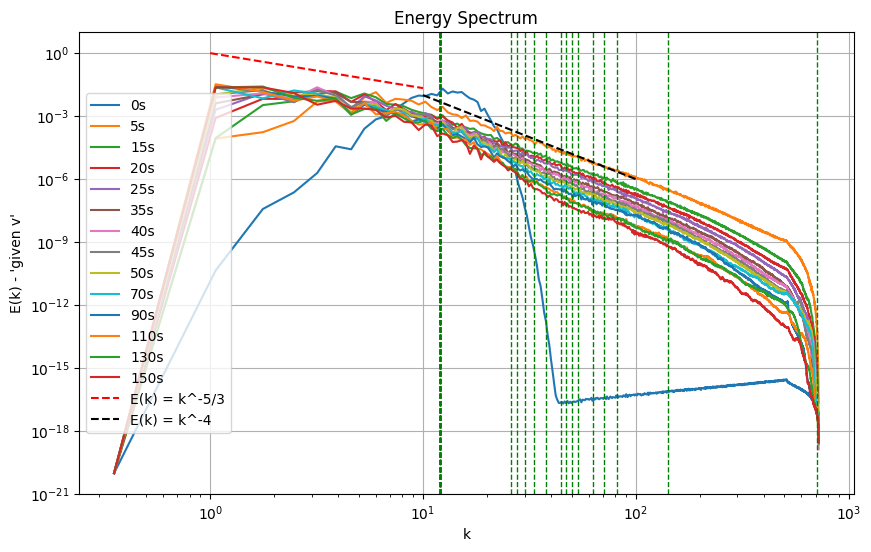

In [66]:
plt.figure(figsize=(10, 6))
kdiss1 = np.array([])
for file in files_vor:
    data, label = get_vorticity(file)
    kdiss1_1 = kdiss(float(label), 0.00001)
    kdiss1 = np.append(kdiss1, kdiss1_1) 
    
for file in files:
    velocity_plotting(file)

for x in kdiss1:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - 'given v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

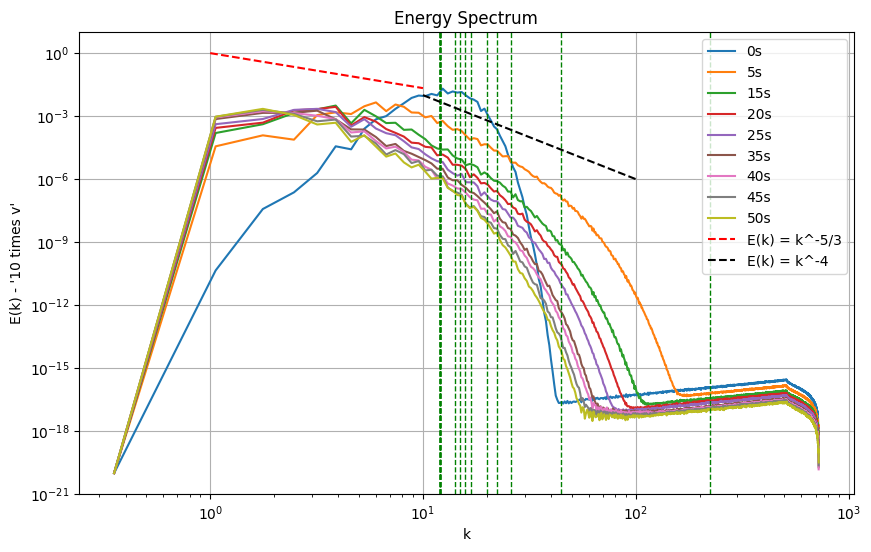

In [67]:
plt.figure(figsize=(10, 6))
kdiss2 = np.array([])
for file in files2_vor:
    data, label = get_vorticity(file)
    kdiss2_2 = kdiss(float(label), 0.0001)
    kdiss2 = np.append(kdiss2, kdiss2_2) 
    
for file in files2:
    velocity_plotting(file)

for x in kdiss2:
    plt.axvline(x=x, color='g', linestyle='--', linewidth=1)#, label=f"x = {x}")
    plt.axvline(x=12, color='g', linestyle='--', linewidth=1)
    
compared_line()

plt.xlabel("k")
plt.ylabel("E(k) - '10 times v'")
plt.title("Energy Spectrum")
plt.legend()
plt.grid(True)
plt.show()

## Fitting ##

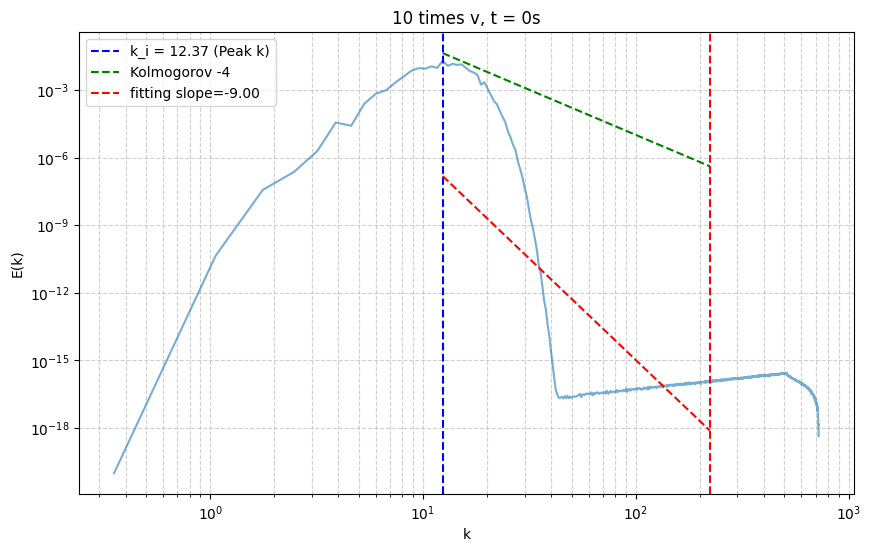

k_i (Peak k): 12.374
fitting slope: -8.996
deviation: 124.91%
R²: 0.551


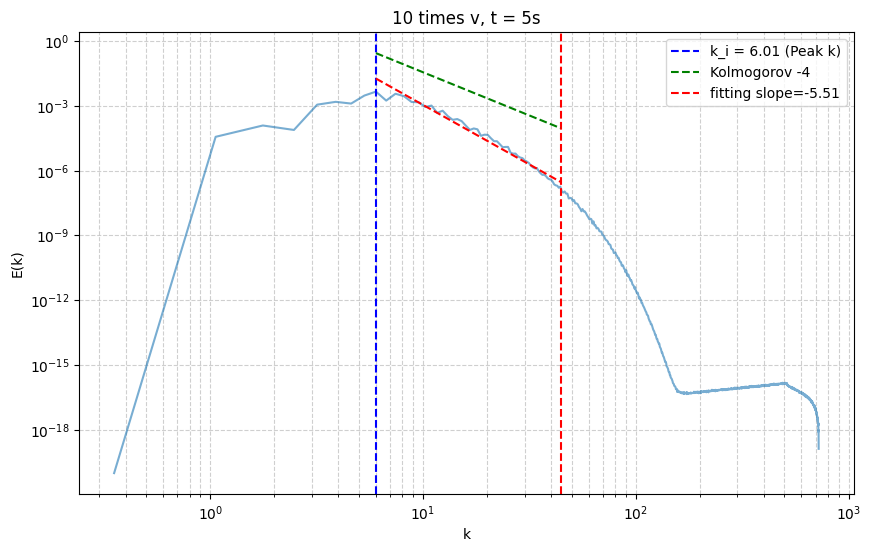

k_i (Peak k): 6.010
fitting slope: -5.511
deviation: 37.77%
R²: 0.974


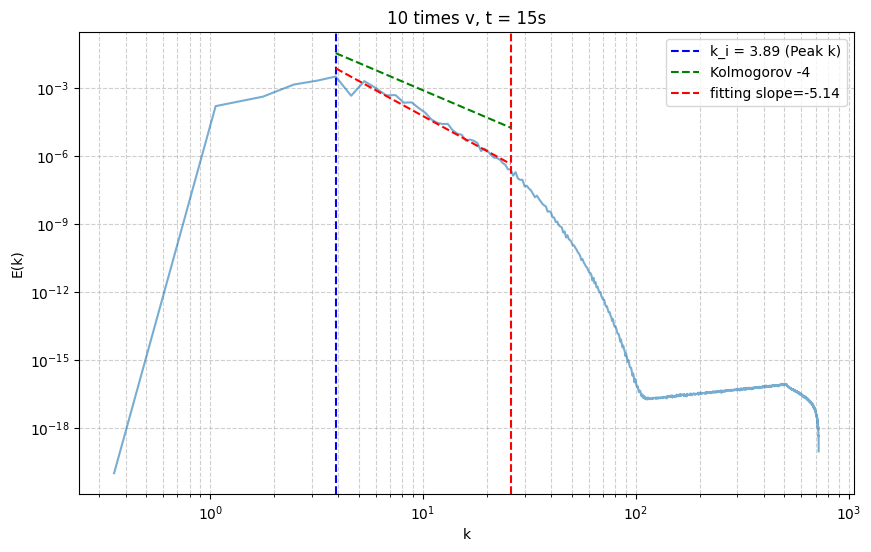

k_i (Peak k): 3.889
fitting slope: -5.137
deviation: 28.42%
R²: 0.966


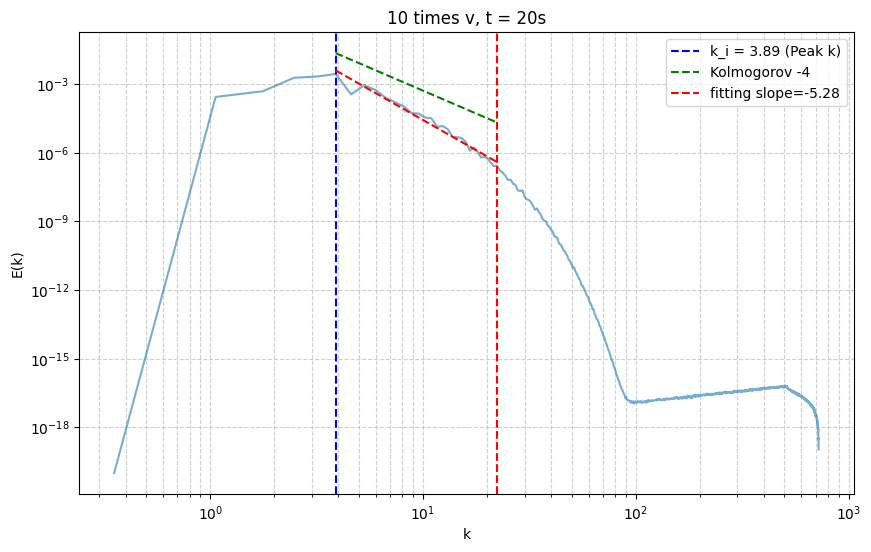

k_i (Peak k): 3.889
fitting slope: -5.282
deviation: 32.04%
R²: 0.972


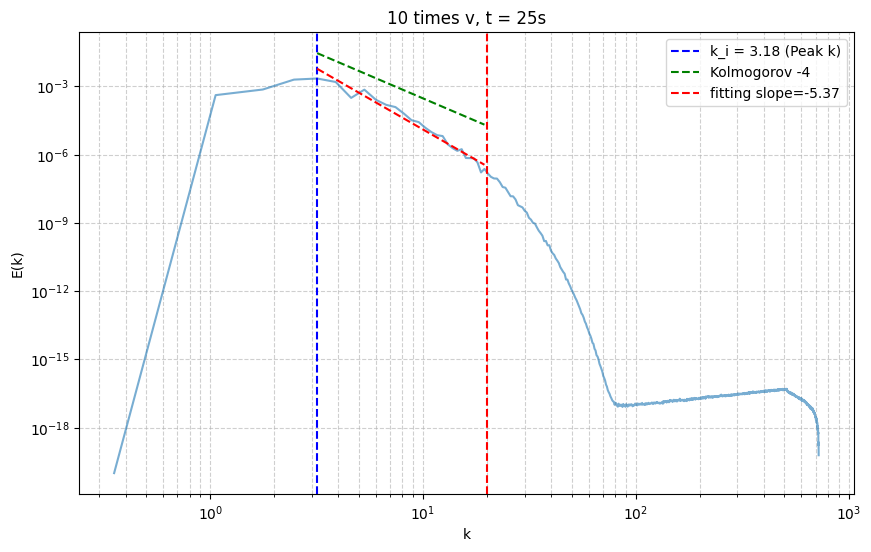

k_i (Peak k): 3.182
fitting slope: -5.367
deviation: 34.19%
R²: 0.971


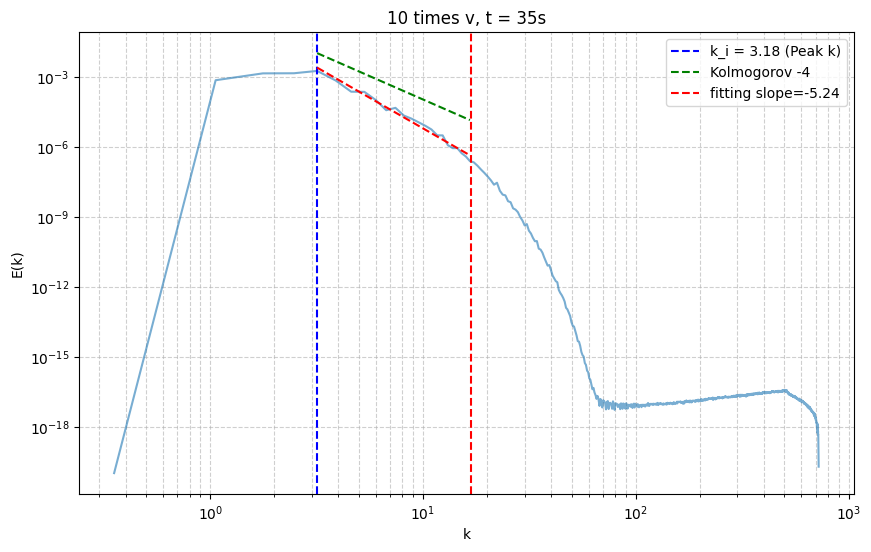

k_i (Peak k): 3.182
fitting slope: -5.239
deviation: 30.98%
R²: 0.983


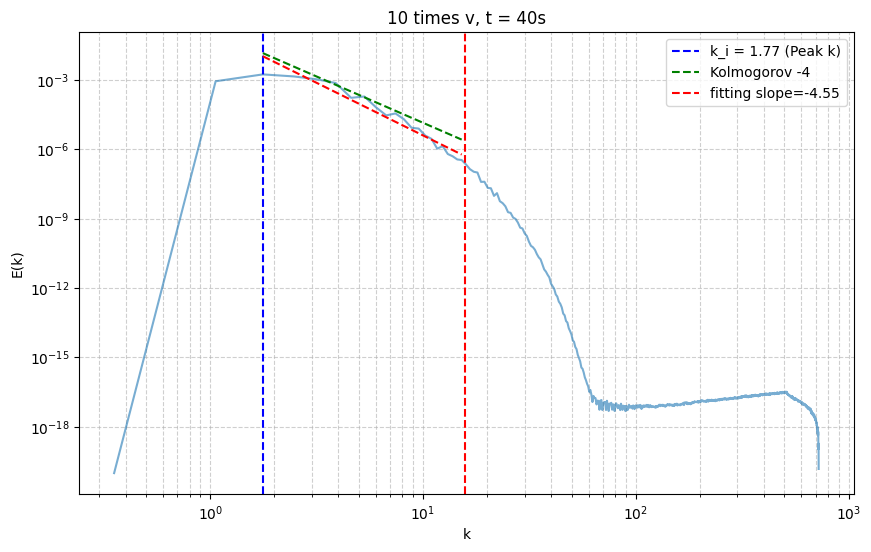

k_i (Peak k): 1.768
fitting slope: -4.546
deviation: 13.65%
R²: 0.943


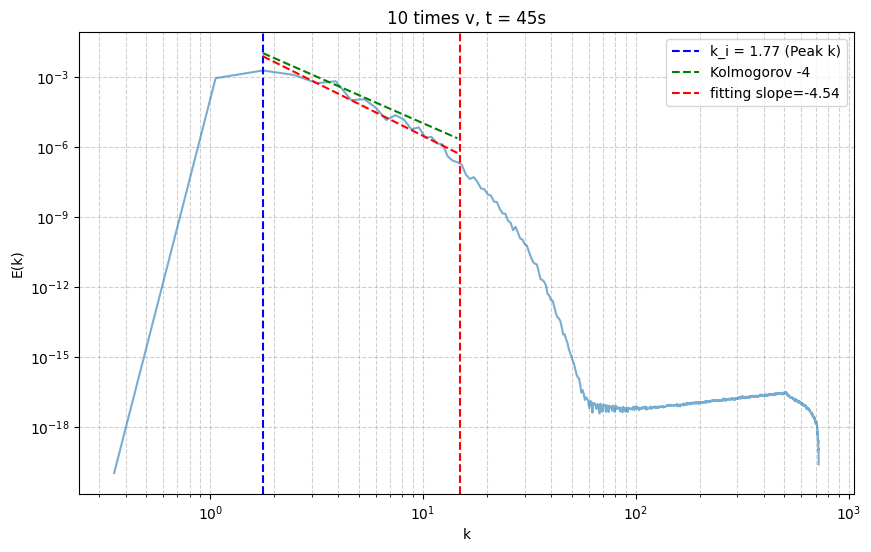

k_i (Peak k): 1.768
fitting slope: -4.544
deviation: 13.59%
R²: 0.945


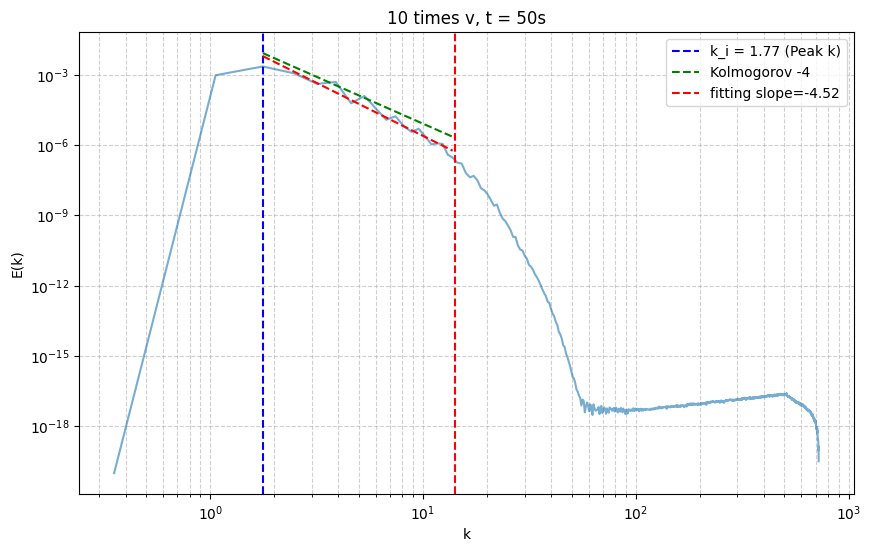

k_i (Peak k): 1.768
fitting slope: -4.519
deviation: 12.97%
R²: 0.960


In [68]:
##### fitting 10 times v #####

for file, k_diss in zip(files2, kdiss2):
    k, e_k = get_ek(file)
    e_k[0] = 10e-21
    #inertial range
    k_i_index = np.argmax(e_k)
    k_i = k[k_i_index]
    k_min, k_max = k_i, k_diss
    mask = (k >= k_min) & (k <= k_max)
    k_vals = k[mask]
    E_vals = e_k[mask]

    log_k = np.log10(k_vals)
    log_E = np.log10(E_vals)

    slope, intercept, r_value, _, _ = stats.linregress(log_k, log_E)

    kolmogorov_slope = -4
    label = file.split('/')[-1].split('_')[0]
    plt.figure(figsize=(10,6))
    plt.loglog(k, e_k, '-', alpha=0.6)
    plt.axvline(k_i, color='b', linestyle='--', label=f'k_i = {k_i:.2f} (Peak k)')
    plt.axvline(k_diss, color='r', linestyle='--')
    plt.loglog(k_vals, 10**(kolmogorov_slope * log_k + intercept), '--g', label=f"Kolmogorov -4")
    plt.loglog(k_vals, 10**(slope * log_k + intercept), '--r', label=f"fitting slope={slope:.2f}")
    plt.title(f'10 times v, t = {label}s')
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.show()

    print(f"k_i (Peak k): {k_i:.3f}")
    print(f"fitting slope: {slope:.3f}")
    print(f"deviation: {abs(slope - kolmogorov_slope)/abs(kolmogorov_slope) * 100:.2f}%")
    print(f"R²: {r_value**2:.3f}")

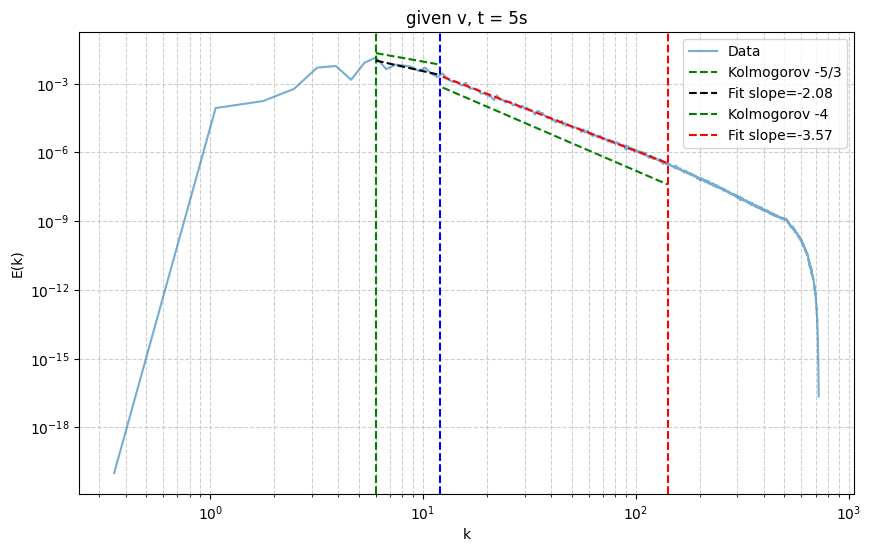

------------------------
Energy(ENG) inertial range Slope: -2.084
Deviation from -5/3: 25.04%
R² for Inverse Cascade: 0.698
------------------------
Enstophy(EST) inertial range Slope: -3.568
Deviation from -4: 10.80%
R² for EST: 0.997


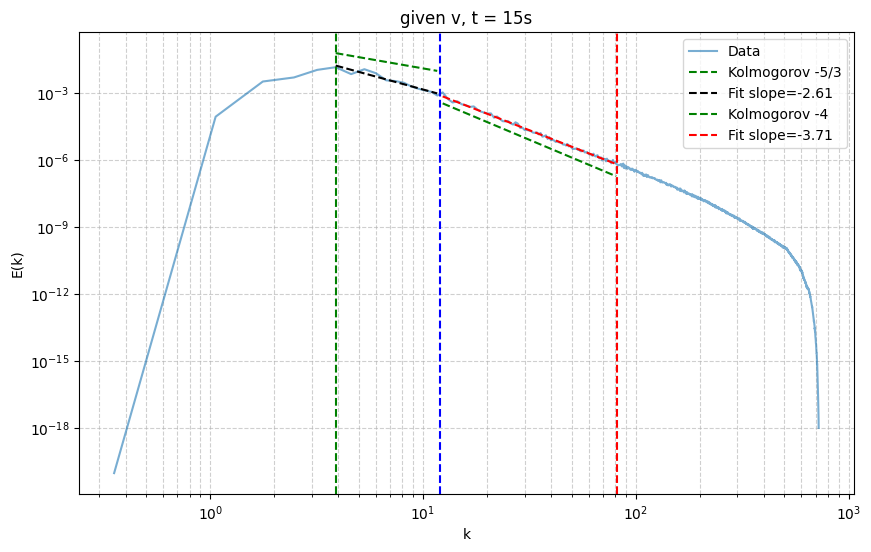

------------------------
Energy(ENG) inertial range Slope: -2.611
Deviation from -5/3: 56.67%
R² for Inverse Cascade: 0.937
------------------------
Enstophy(EST) inertial range Slope: -3.714
Deviation from -4: 7.15%
R² for EST: 0.996


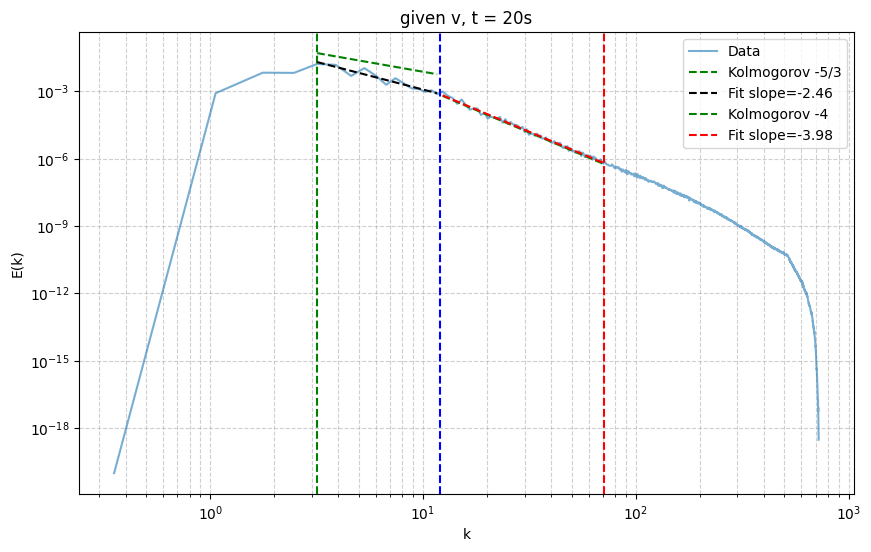

------------------------
Energy(ENG) inertial range Slope: -2.459
Deviation from -5/3: 47.55%
R² for Inverse Cascade: 0.904
------------------------
Enstophy(EST) inertial range Slope: -3.977
Deviation from -4: 0.57%
R² for EST: 0.992


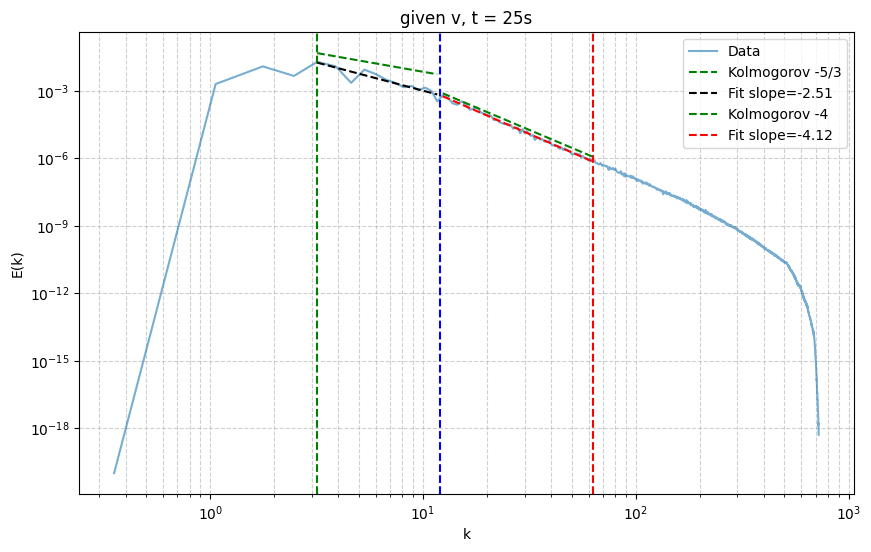

------------------------
Energy(ENG) inertial range Slope: -2.508
Deviation from -5/3: 50.46%
R² for Inverse Cascade: 0.833
------------------------
Enstophy(EST) inertial range Slope: -4.120
Deviation from -4: 3.00%
R² for EST: 0.994


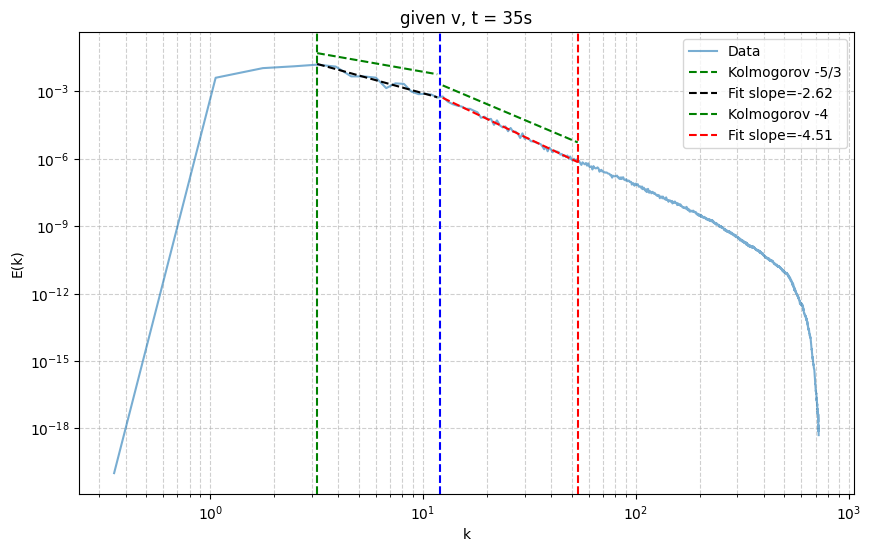

------------------------
Energy(ENG) inertial range Slope: -2.625
Deviation from -5/3: 57.48%
R² for Inverse Cascade: 0.945
------------------------
Enstophy(EST) inertial range Slope: -4.507
Deviation from -4: 12.68%
R² for EST: 0.993


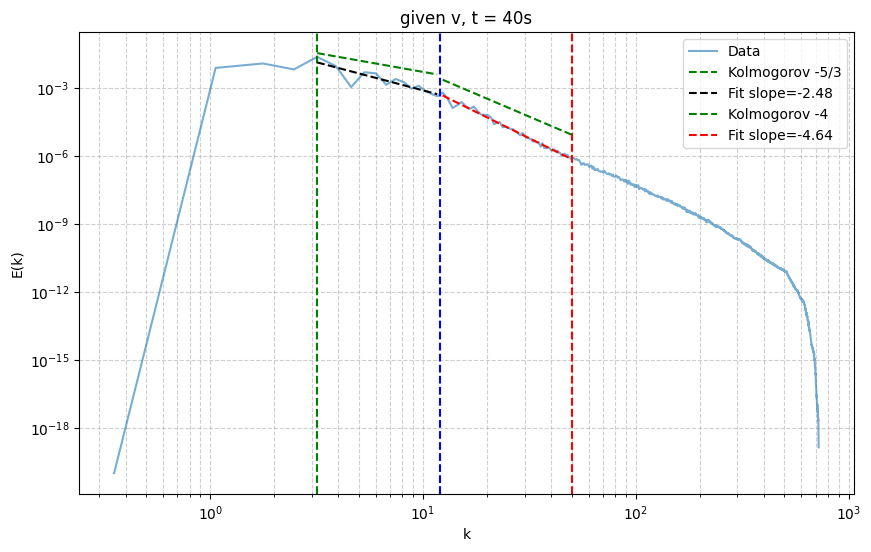

------------------------
Energy(ENG) inertial range Slope: -2.482
Deviation from -5/3: 48.90%
R² for Inverse Cascade: 0.765
------------------------
Enstophy(EST) inertial range Slope: -4.636
Deviation from -4: 15.90%
R² for EST: 0.989


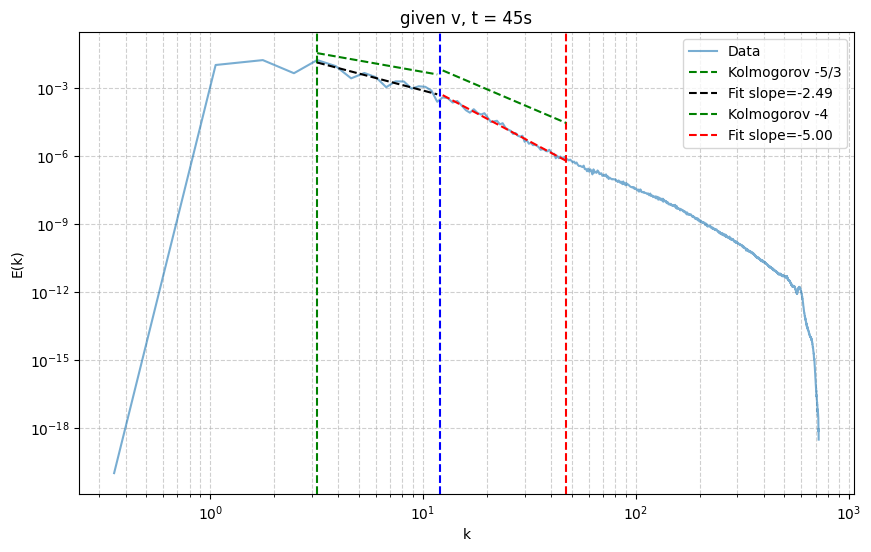

------------------------
Energy(ENG) inertial range Slope: -2.489
Deviation from -5/3: 49.37%
R² for Inverse Cascade: 0.853
------------------------
Enstophy(EST) inertial range Slope: -4.999
Deviation from -4: 24.97%
R² for EST: 0.991


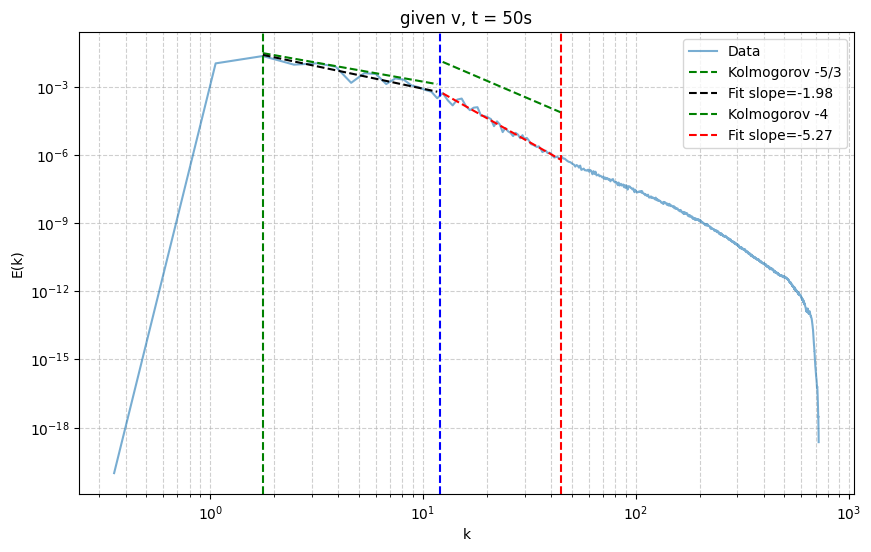

------------------------
Energy(ENG) inertial range Slope: -1.978
Deviation from -5/3: 18.68%
R² for Inverse Cascade: 0.873
------------------------
Enstophy(EST) inertial range Slope: -5.265
Deviation from -4: 31.63%
R² for EST: 0.985


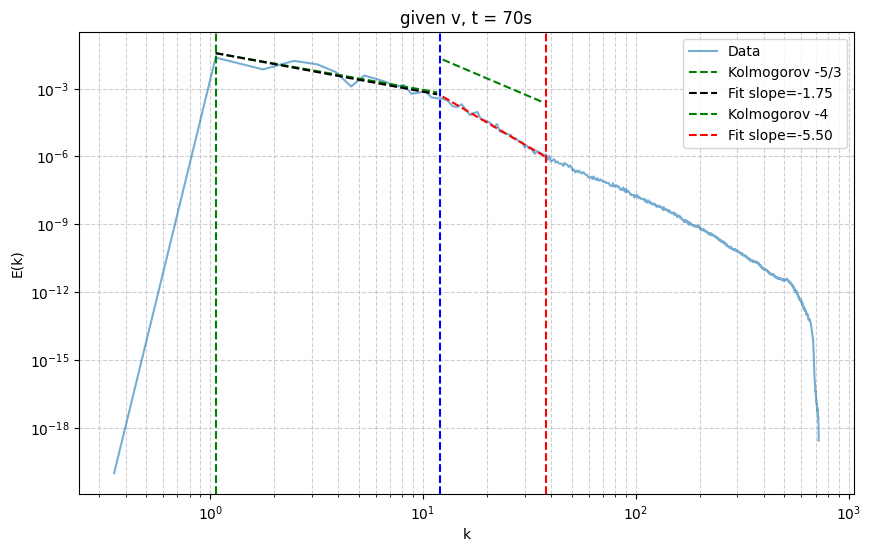

------------------------
Energy(ENG) inertial range Slope: -1.747
Deviation from -5/3: 4.85%
R² for Inverse Cascade: 0.851
------------------------
Enstophy(EST) inertial range Slope: -5.499
Deviation from -4: 37.48%
R² for EST: 0.988


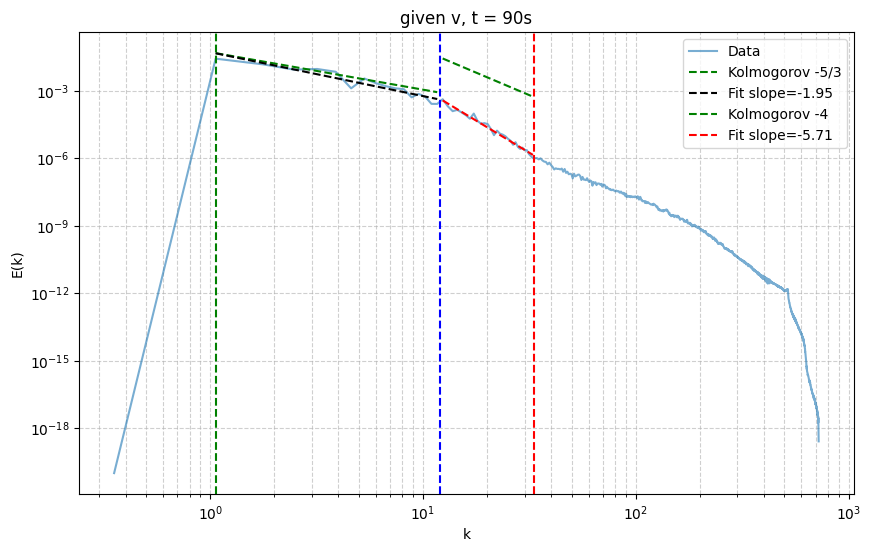

------------------------
Energy(ENG) inertial range Slope: -1.952
Deviation from -5/3: 17.11%
R² for Inverse Cascade: 0.904
------------------------
Enstophy(EST) inertial range Slope: -5.707
Deviation from -4: 42.66%
R² for EST: 0.981


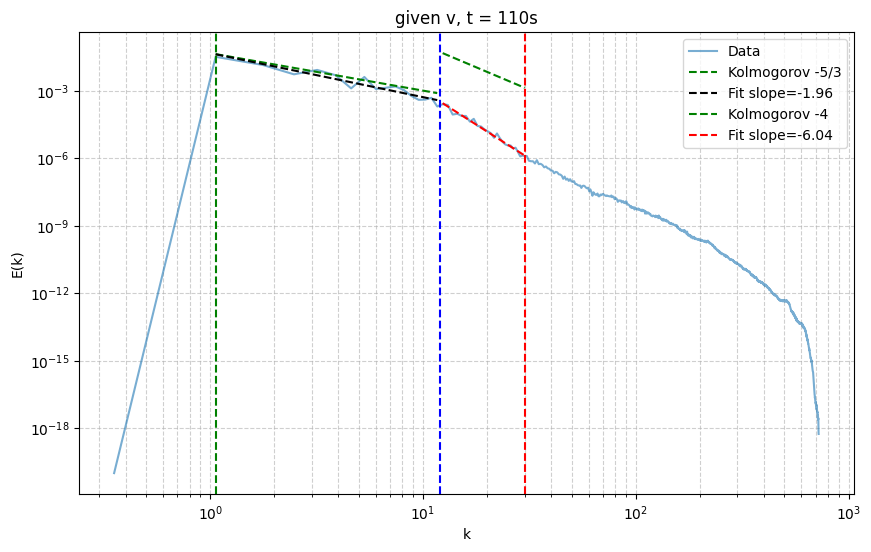

------------------------
Energy(ENG) inertial range Slope: -1.957
Deviation from -5/3: 17.40%
R² for Inverse Cascade: 0.909
------------------------
Enstophy(EST) inertial range Slope: -6.039
Deviation from -4: 50.98%
R² for EST: 0.983


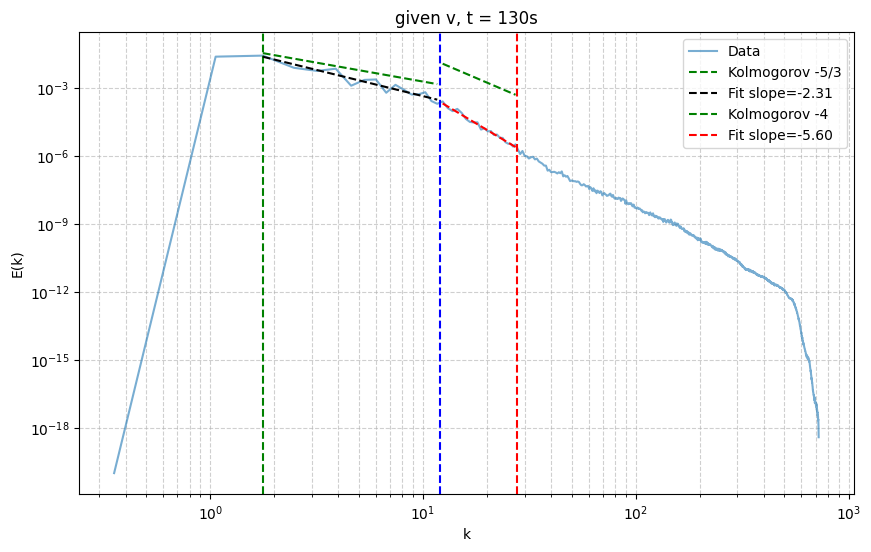

------------------------
Energy(ENG) inertial range Slope: -2.309
Deviation from -5/3: 38.53%
R² for Inverse Cascade: 0.910
------------------------
Enstophy(EST) inertial range Slope: -5.604
Deviation from -4: 40.11%
R² for EST: 0.983


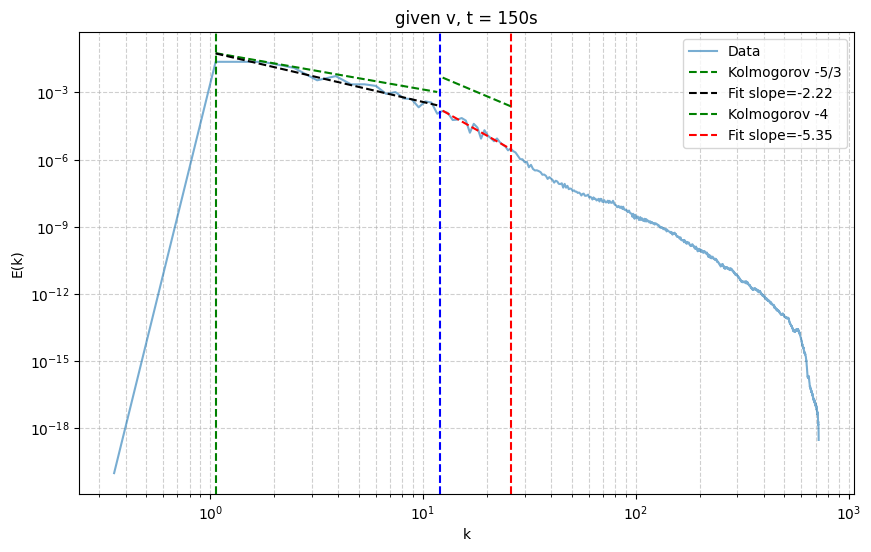

------------------------
Energy(ENG) inertial range Slope: -2.223
Deviation from -5/3: 33.40%
R² for Inverse Cascade: 0.919
------------------------
Enstophy(EST) inertial range Slope: -5.352
Deviation from -4: 33.81%
R² for EST: 0.935


In [69]:
##### fitting given v #####

k_i = 12

for file, k_diss in zip(files, kdiss1):
    k, e_k = get_ek(file)
    e_k[0] = 10e-21 

    k_eps_index = np.argmax(e_k)
    k_eps = k[k_eps_index]
    if k_eps > 12:
        continue
    k_min1, k_max1 = k_eps, k_i
    mask1 = (k >= k_min1) & (k <= k_max1)
    k_vals1 = k[mask1]
    E_vals1 = e_k[mask1]
    
    log_k1 = np.log10(k_vals1)
    log_E1 = np.log10(E_vals1)
    
    slope1, intercept1, r_value1, _, _ = stats.linregress(log_k1, log_E1)

    mask2 = (k >= k_i) & (k <= k_diss)
    k_vals2 = k[mask2]
    E_vals2 = e_k[mask2]

    log_k2 = np.log10(k_vals2)
    log_E2 = np.log10(E_vals2)

    slope2, intercept2, r_value2, _, _ = stats.linregress(log_k2, log_E2)

    kolmogorov_slope1 = -5/3  # Energy inertial range
    kolmogorov_slope2 = -4    # Enstophy inertial range

    label = file.split('/')[-1].split('_')[0]

    plt.figure(figsize=(10,6))
    plt.loglog(k, e_k, '-', alpha=0.6, label="Data")
    plt.axvline(k_eps, color='g', linestyle='--')
    plt.axvline(k_i, color='b', linestyle='--')
    plt.axvline(k_diss, color='r', linestyle='--')

    plt.loglog(k_vals1, 10**(kolmogorov_slope1 * log_k1 + intercept1), '--g', label=f"Kolmogorov -5/3")
    plt.loglog(k_vals1, 10**(slope1 * log_k1 + intercept1), linestyle='--', color='black', label=f"Fit slope={slope1:.2f}")

    plt.loglog(k_vals2, 10**(kolmogorov_slope2 * log_k2 + intercept2), '--g', label=f"Kolmogorov -4")
    plt.loglog(k_vals2, 10**(slope2 * log_k2 + intercept2), '--r', label=f"Fit slope={slope2:.2f}")

    plt.title(f'given v, t = {label}s')
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.show()

    print("------------------------")
    print(f"Energy(ENG) inertial range Slope: {slope1:.3f}")
    print(f"Deviation from -5/3: {abs(slope1 - kolmogorov_slope1)/abs(kolmogorov_slope1) * 100:.2f}%")
    print(f"R² for Inverse Cascade: {r_value1**2:.3f}")
    print("------------------------")
    print(f"Enstophy(EST) inertial range Slope: {slope2:.3f}")
    print(f"Deviation from -4: {abs(slope2 - kolmogorov_slope2)/abs(kolmogorov_slope2) * 100:.2f}%")
    print(f"R² for EST: {r_value2**2:.3f}")


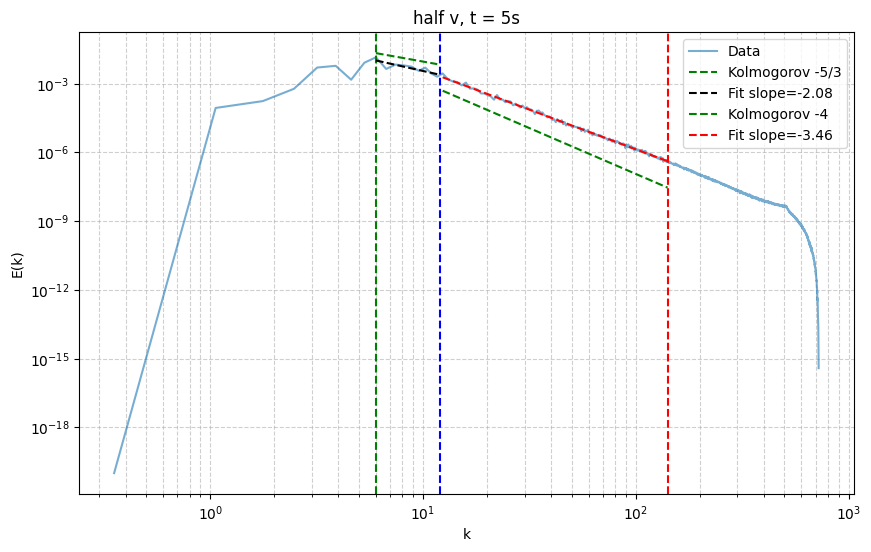

------------------------
Energy(ENG) inertial range Slope: -2.077
Deviation from -5/3: 24.63%
R² for Inverse Cascade: 0.699
------------------------
Enstophy(EST) inertial range Slope: -3.463
Deviation from -4: 13.41%
R² for EST: 0.997


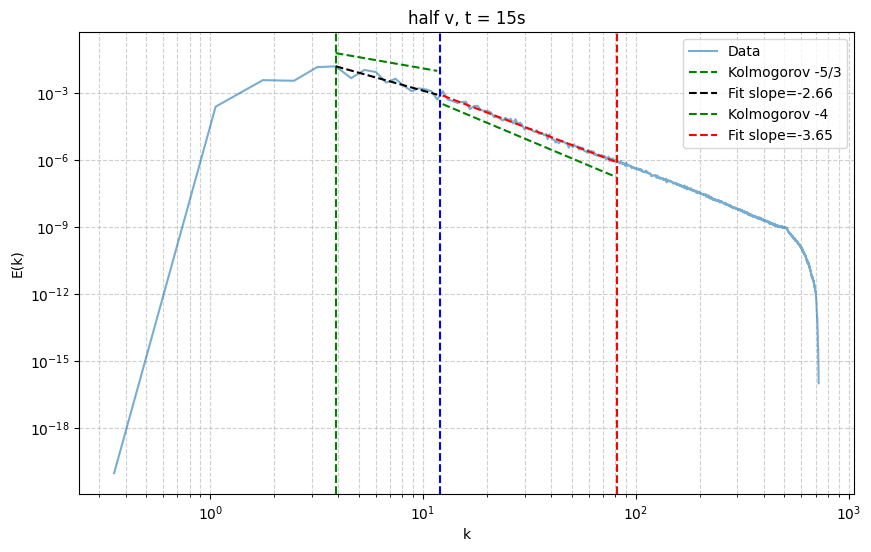

------------------------
Energy(ENG) inertial range Slope: -2.663
Deviation from -5/3: 59.81%
R² for Inverse Cascade: 0.840
------------------------
Enstophy(EST) inertial range Slope: -3.647
Deviation from -4: 8.82%
R² for EST: 0.992


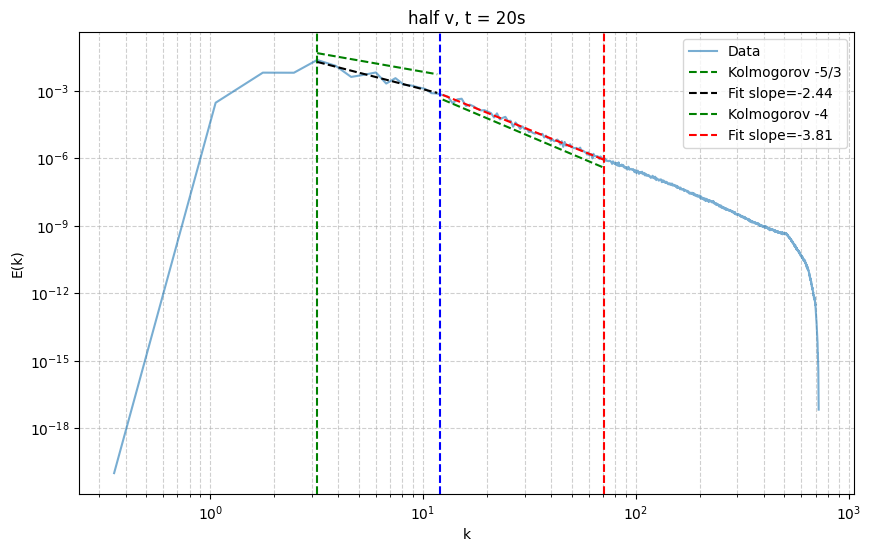

------------------------
Energy(ENG) inertial range Slope: -2.444
Deviation from -5/3: 46.61%
R² for Inverse Cascade: 0.920
------------------------
Enstophy(EST) inertial range Slope: -3.810
Deviation from -4: 4.76%
R² for EST: 0.992


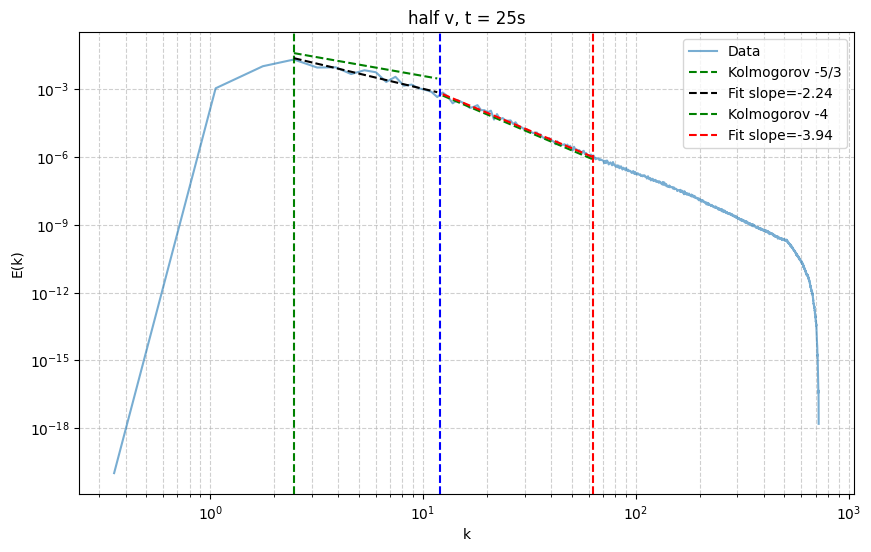

------------------------
Energy(ENG) inertial range Slope: -2.236
Deviation from -5/3: 34.16%
R² for Inverse Cascade: 0.914
------------------------
Enstophy(EST) inertial range Slope: -3.943
Deviation from -4: 1.42%
R² for EST: 0.992


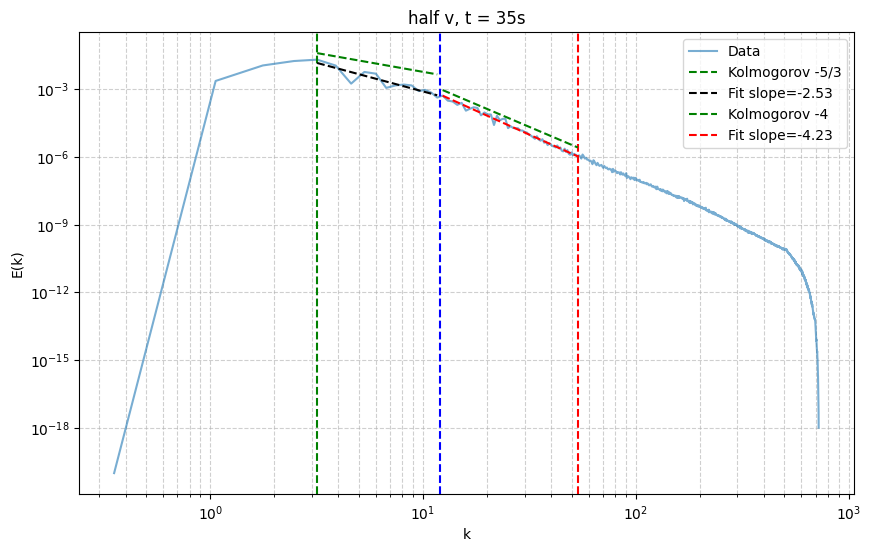

------------------------
Energy(ENG) inertial range Slope: -2.533
Deviation from -5/3: 51.99%
R² for Inverse Cascade: 0.831
------------------------
Enstophy(EST) inertial range Slope: -4.228
Deviation from -4: 5.70%
R² for EST: 0.986


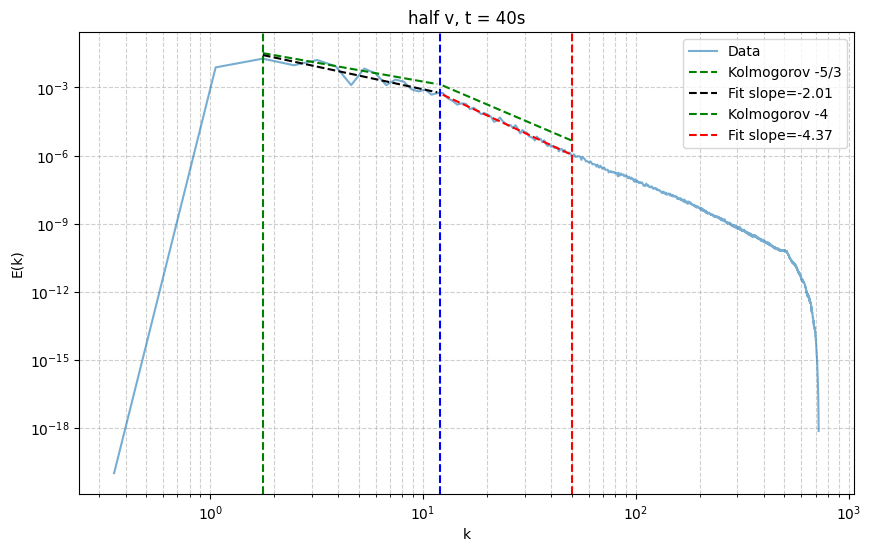

------------------------
Energy(ENG) inertial range Slope: -2.006
Deviation from -5/3: 20.39%
R² for Inverse Cascade: 0.824
------------------------
Enstophy(EST) inertial range Slope: -4.370
Deviation from -4: 9.25%
R² for EST: 0.991


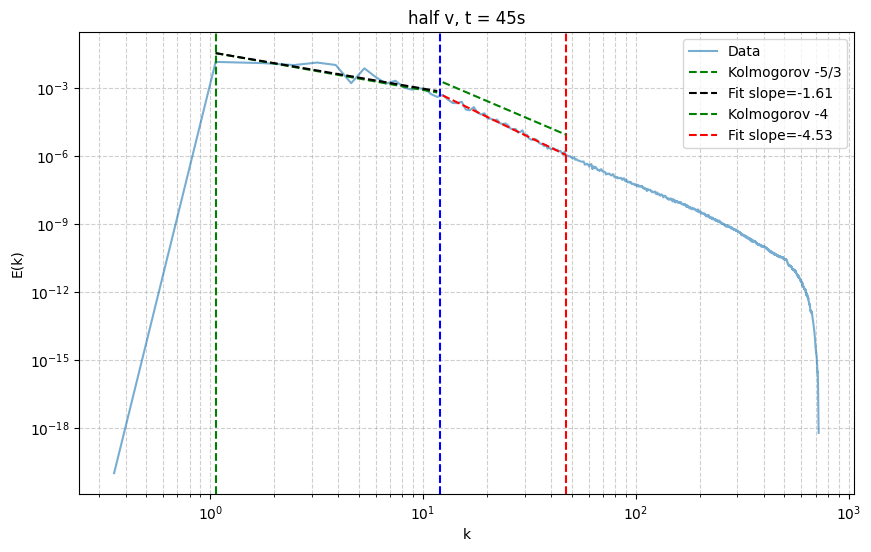

------------------------
Energy(ENG) inertial range Slope: -1.607
Deviation from -5/3: 3.56%
R² for Inverse Cascade: 0.798
------------------------
Enstophy(EST) inertial range Slope: -4.534
Deviation from -4: 13.36%
R² for EST: 0.992


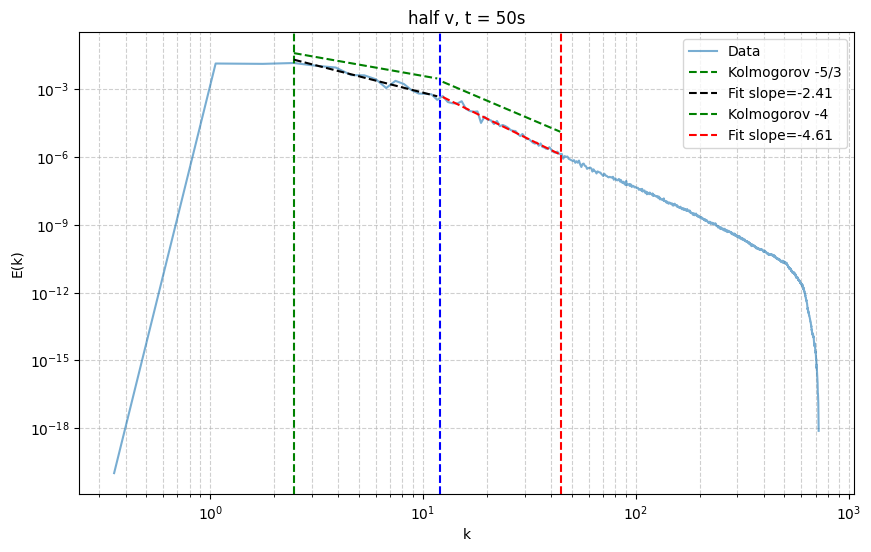

------------------------
Energy(ENG) inertial range Slope: -2.407
Deviation from -5/3: 44.42%
R² for Inverse Cascade: 0.942
------------------------
Enstophy(EST) inertial range Slope: -4.614
Deviation from -4: 15.35%
R² for EST: 0.988


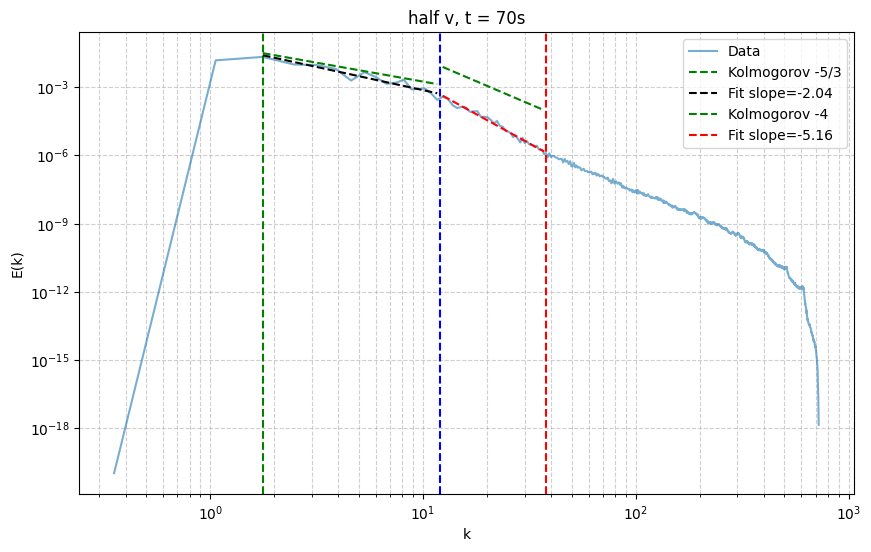

------------------------
Energy(ENG) inertial range Slope: -2.044
Deviation from -5/3: 22.61%
R² for Inverse Cascade: 0.909
------------------------
Enstophy(EST) inertial range Slope: -5.161
Deviation from -4: 29.02%
R² for EST: 0.984


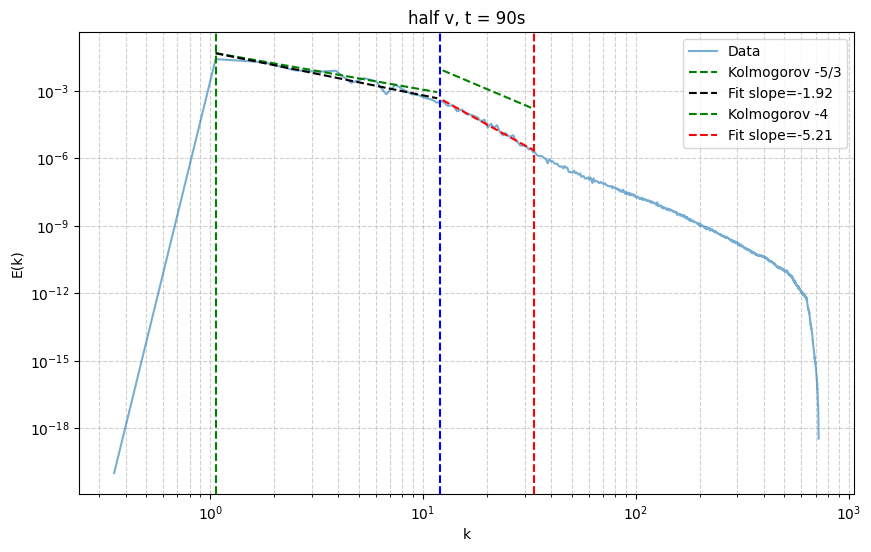

------------------------
Energy(ENG) inertial range Slope: -1.920
Deviation from -5/3: 15.21%
R² for Inverse Cascade: 0.914
------------------------
Enstophy(EST) inertial range Slope: -5.211
Deviation from -4: 30.27%
R² for EST: 0.981


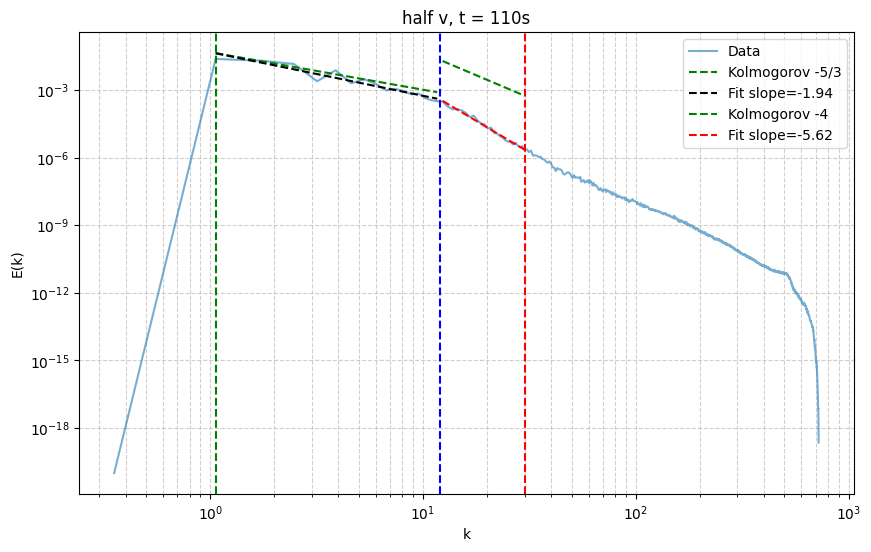

------------------------
Energy(ENG) inertial range Slope: -1.936
Deviation from -5/3: 16.19%
R² for Inverse Cascade: 0.919
------------------------
Enstophy(EST) inertial range Slope: -5.621
Deviation from -4: 40.52%
R² for EST: 0.988


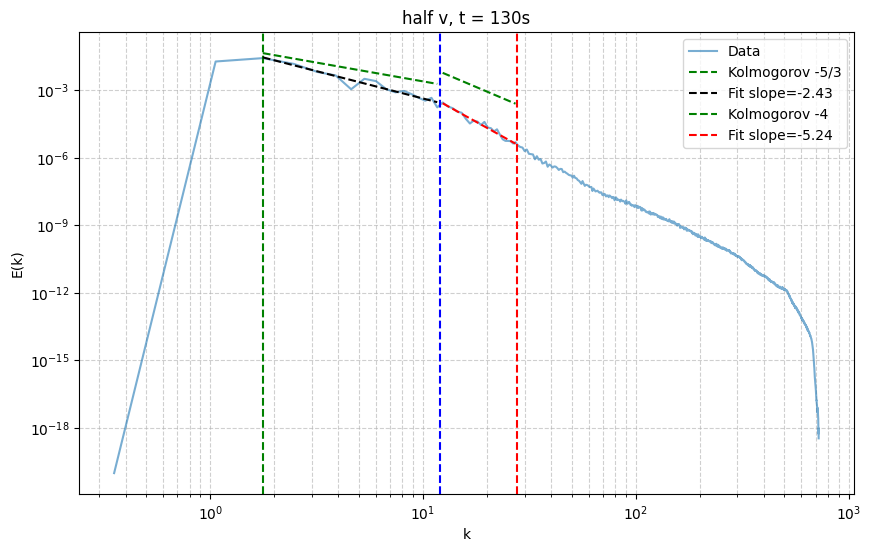

------------------------
Energy(ENG) inertial range Slope: -2.426
Deviation from -5/3: 45.57%
R² for Inverse Cascade: 0.932
------------------------
Enstophy(EST) inertial range Slope: -5.237
Deviation from -4: 30.92%
R² for EST: 0.970


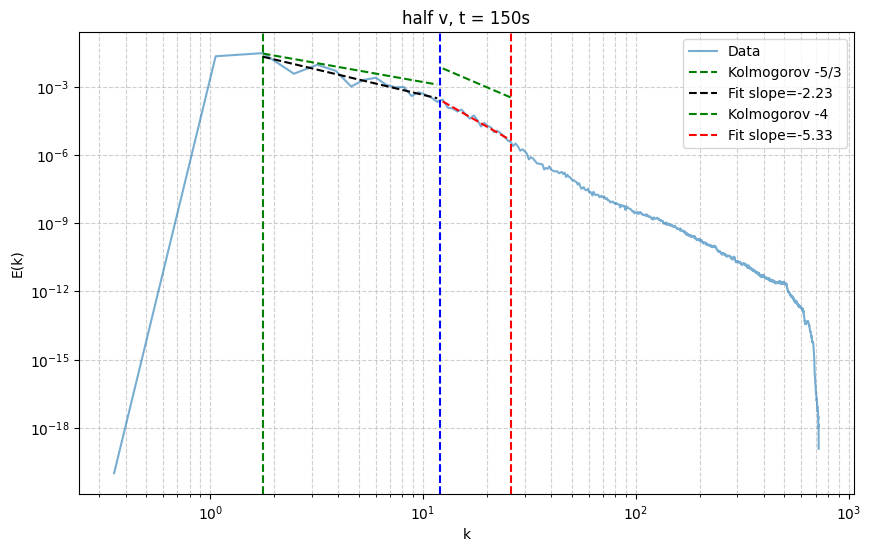

------------------------
Energy(ENG) inertial range Slope: -2.231
Deviation from -5/3: 33.85%
R² for Inverse Cascade: 0.881
------------------------
Enstophy(EST) inertial range Slope: -5.332
Deviation from -4: 33.30%
R² for EST: 0.972


In [70]:
##### fitting half v #####

k_i = 12

for file, k_diss in zip(files3, kdiss1):
    k, e_k = get_ek(file)
    e_k[0] = 10e-21 

    k_eps_index = np.argmax(e_k)
    k_eps = k[k_eps_index]
    if k_eps > 12:
        continue
    k_min1, k_max1 = k_eps, k_i
    mask1 = (k >= k_min1) & (k <= k_max1)
    k_vals1 = k[mask1]
    E_vals1 = e_k[mask1]
    
    log_k1 = np.log10(k_vals1)
    log_E1 = np.log10(E_vals1)
    
    slope1, intercept1, r_value1, _, _ = stats.linregress(log_k1, log_E1)

    mask2 = (k >= k_i) & (k <= k_diss)
    k_vals2 = k[mask2]
    E_vals2 = e_k[mask2]

    log_k2 = np.log10(k_vals2)
    log_E2 = np.log10(E_vals2)

    slope2, intercept2, r_value2, _, _ = stats.linregress(log_k2, log_E2)

    kolmogorov_slope1 = -5/3  # Energy inertial range
    kolmogorov_slope2 = -4    # Enstophy inertial range

    label = file.split('/')[-1].split('_')[0]

    plt.figure(figsize=(10,6))
    plt.loglog(k, e_k, '-', alpha=0.6, label="Data")
    plt.axvline(k_eps, color='g', linestyle='--')
    plt.axvline(k_i, color='b', linestyle='--')
    plt.axvline(k_diss, color='r', linestyle='--')

    plt.loglog(k_vals1, 10**(kolmogorov_slope1 * log_k1 + intercept1), '--g', label=f"Kolmogorov -5/3")
    plt.loglog(k_vals1, 10**(slope1 * log_k1 + intercept1), linestyle='--', color='black', label=f"Fit slope={slope1:.2f}")

    plt.loglog(k_vals2, 10**(kolmogorov_slope2 * log_k2 + intercept2), '--g', label=f"Kolmogorov -4")
    plt.loglog(k_vals2, 10**(slope2 * log_k2 + intercept2), '--r', label=f"Fit slope={slope2:.2f}")

    plt.title(f'half v, t = {label}s')
    plt.xlabel("k")
    plt.ylabel("E(k)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.show()

    print("------------------------")
    print(f"Energy(ENG) inertial range Slope: {slope1:.3f}")
    print(f"Deviation from -5/3: {abs(slope1 - kolmogorov_slope1)/abs(kolmogorov_slope1) * 100:.2f}%")
    print(f"R² for Inverse Cascade: {r_value1**2:.3f}")
    print("------------------------")
    print(f"Enstophy(EST) inertial range Slope: {slope2:.3f}")
    print(f"Deviation from -4: {abs(slope2 - kolmogorov_slope2)/abs(kolmogorov_slope2) * 100:.2f}%")
    print(f"R² for EST: {r_value2**2:.3f}")


## Addition Task ##